# sr-study

Author: Eduardo Oñate Oyaneder

---
## 0) Imports

In [1]:
import matplotlib
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from typing import List, Union
import os
from bidict import bidict

---
## 1) Definition of parameters and basic operations

### 1.1) Definition of labels

We will group the speaker labels according to two parameters to find patterns in terms of interclass centroid similarity (check section 3): <br>
by **gender** (male/female) and by **status** (permanent member/guest).

The bidirectional dictionary `LABELS` will hold the pairs `(label_numbers, speaker_name)` in the following order:
* female permanent members,
* female guests,
* male permanent members,
* male guests.

In [2]:
female = [# Permanent members
          'Antonia_Rivas_Palma', 'Beatriz_Hevia_Willer', 'Bettina_Mariela_Horst_Von_Thadden', 'Carmen_Montoya_Mayorga', 'Carolina_Navarrete_Rubio', 'Catalina_Adriana_Lagos_Tschorne',
          'Catalina_Salem_Gesell', 'Cecilia_Medina_Meneses', 'Claudia_Maclean_Bravo', 'Gabriela_Alejandra_Ingeborg_Krauss_Valle', 'Gloria_Hutt_Hesse', 'Gloria_Paredes_Diaz', 'Ivon_Guerra_Aguilera', 'Ivonne_Mangelsdorff_Galeb', 'Jessica_Bengoa_Mayorga', 'Jocelyn_Ormeno_Lee', 'Karen_Araya_Rojas', 'Katherine_Denisse_Martorell_Awad', 'Kinturay_Melin_Rapiman', 'Leslie_Sanchez_Lobos', 'Lorena_Gallardo_Cardenas', 'Magaly_Fuenzalida_Colombo', 'Marcela_Araya_Sepulveda', 'Marcela_Ines_Peredo_Rojas', 'Maria_Claudia_Jorquera_Coria', 'Maria_Gatica_Gajardo', 'Maria_Pardo_Vergara', 'Maria_de_los_Angeles_Lopez_Porfiri', 'Mariela_Fincheira_Massardo', 'Nancy_Marquez_Gonzalez', 'Natalia_Gonzalez_Banados', 'Ninoska_Payauna_Vilca', 'Paloma_Zuniga_Cerda', 'Patricia_Spoerer_Price', 'Paz_Anastasiadis_Le_Roy', 'Pilar_Cuevas_Mardones', 'Secretaria_Maria_Soledad_Fredes','Veronica_Undurraga_Valdes',
          # Guests
          'Invitada_Antonia_Polanco', 'Invitada_Bernardita_Valdes', 'Invitada_Carmen_Dominguez', 'Invitada_Cecilia_Jara', 'Invitada_Daphne_Cardenas', 'Invitada_Giannina_Mondino', 'Invitada_Javiera_Diaz', 'Invitada_Josefa_Balmaceda', 'Invitada_Lidia_Casas', 'Invitada_Michelle_Bachelet', 'Invitada_Nancy_Yanez', 'Invitada_Nataly_Soto', 'Invitada_Paola_Vega', 'Invitada_Rosanna_Costa', 'Invitada_Rosario_Vidal']

male = [# Permanent members
        'Aldo_Valle_Acevedo', 'Alejandro_Kohler_Vargas', 'Alexis_Omar_Cortes_Morales', 'Alihuen_Antileo_Navarrete', 'Antonio_Barchiesi_Chavez', 'Arturo_Phillips_Dorr',
        'Carlos_Frontaura_Rivera', 'Carlos_Recondo_Lavanderos', 'Carlos_Solar_Barrios', 'Christian_Suarez_Crothers', 'Diego_Vargas_Castillo', 'Domingo_Lovera_Parmo', 'Edmundo_Eluchans_Urenda', 'Fernando_Viveros_Reyes', 'Flavio_Quezada_Rodriguez', 'Gabriel_Ignacio_Osorio_Vargas', 'German_Becker_Alvear', 'Hector_Urban_Astete', 'Hernan_Larrain_Fernandez', 'Jaime_Arancibia_Mattar', 'Jorge_De_La_Maza_Schleyer', 'Jorge_Ossandon_Spoerer', 'Jose_Gonzalez_Pizarro', 'Jose_Sebastian_Soto_Velasco', 'Juan_Jose_Ossa_Santa_Cruz', 'Julio_Nanco_Antilef',  'Luis_Silva_Irarrazaval', 'Maximo_Francisco_Pavez_Cantillano', 'Miguel_Littin_Cucumides', 'Miguel_Rojas_Soto', 'Paul_Sfeir_Rubio', 'Ricardo_Ortega_Perrier', 'Sebastian_Figueroa_Melo', 'Sebastian_Parraguez_Gonzalez', 'Secretario_Carlos_Camara', 'Secretario_Luis_Rojas', 'Secretario_Mario_Rebolledo', 'Secretario_Reynaldo_Nunez', 'Teodoro_Javier_Ribera_Neumann', 'Yerko_Ljubetic_Godoy',
        # Guests
        'Invitado_Alejandro_Sanguino', 'Invitado_Alfredo_Sierra_Herrero', 'Invitado_Angel_Valencia', 'Invitado_Carlos_Lopez', 'Invitado_Carlos_Mendez', 'Invitado_Carlos_Mora', 'Invitado_Christian_Chavez', 'Invitado_Claudio_Alvarado', 'Invitado_Claudio_Orrego', 'Invitado_Enrique_Navarro_Beltran', 'Invitado_Eric_Menay_Pino', 'Invitado_Felipe_Bravo', 'Invitado_Gabriel_Bocksang', 'Invitado_Gonzalo_Garcia', 'Invitado_Jaime_Mozo', 'Invitado_Javier_Coussot_Salas', 'Invitado_Jorge_Acosta', 'Invitado_Jorge_Bermudez', 'Invitado_Jose_Domingo_Rojas', 'Invitado_Jose_Ignacio_Vasquez', 'Invitado_Jose_Montt', 'Invitado_Juan_Eduardo_Fuentes', 'Invitado_Juan_Ignacio_Gonzalez', 'Invitado_Leonardo_Moreno', 'Invitado_Leopoldo_Llanos', 'Invitado_Miguel_Lawner', 'Invitado_Mijail_Bonito', 'Invitado_Nicolas_Enteiche', 'Invitado_Ricardo_Irarrazabal', 'Invitado_Ricardo_Lagos', 'Invitado_Ricardo_Yanez', 'Invitado_Santiago', 'Invitado_Sarko_Luksic', 'Invitado_Sebastian_Sotelo']

label_names = female + male
label_nums = [i for i in range(len(label_names))]
LABELS = bidict(zip(label_nums, label_names))  # Bidirectional mapping between grouped label numbers and grouped label names


"""
LABELS = bidict({0: 'Antonia_Rivas_Palma', 1: 'Beatriz_Hevia_Willer', ..., 126: 'Invitado_Sebastian_Sotelo'})
"""

EMBS_PER_SHUFFLE = 20

### 1.2) Definition of functions for basic operations

Extracting embeddings from `.pkl` files:

In [3]:
def get_embeddings(file_path: str, min_samples: int = EMBS_PER_SHUFFLE):
    """
    Reads embeddings from a pickle file and returns the label vector, embeddings
    and embeddings grouped by label considering only the speakers with at least `min_samples` samples.

    Args:
        file_path (str): Path to the pickle file containing the embeddings
        min_samples (int): Minimum number of samples a speaker must have to be considered
    
    Returns:
        label_vector (np.array): Array with the labels of the embeddings
        embeddings (np.array): Array with the embeddings
        ordered_embeddings_by_label (dict): Dictionary with the embeddings grouped by label
    """
    data = pickle.load(open(file_path, 'rb'))

    # Store embeddings grouped by label
    embeddings_by_label = {}
    
    # Iterate over the dictionary items
    for key, value in data.items():
        # Parse the key to extract the label
        _, label, _ = key.split('@')

        # If the label is not in the dictionary, add it with an empty list
        if label not in embeddings_by_label:
            embeddings_by_label[label] = []

        # Append the embedding to the correct label list
        embeddings_by_label[label].append(value)

    keys = list(embeddings_by_label.keys())
    # keys.sort()
    for label in keys:
        if len(embeddings_by_label[label]) < min_samples:
            del embeddings_by_label[label]  # Remove speakers with less than m samples
    
    
    # Create a new dictionary with the keys ordered according to the new order
    ordered_embeddings_by_label = {key: embeddings_by_label[key] 
                                   for key in list(LABELS.values())
                                   if key in embeddings_by_label}
    
    embeddings = []
    label_vector = []

    for label, emb_list in ordered_embeddings_by_label.items():
        # Extend the embeddings list
        embeddings.extend(emb_list)
        # Append the label to the label vector
        label_vector += [LABELS.inv[label]] * len(emb_list)


    return np.array(label_vector), np.array(embeddings), ordered_embeddings_by_label

Computing normalized cosine similarity:

In [4]:
def cosine_similarity(vec1, vec2):
    """
    Compute the cosine similarity between two vectors.
    Since embeddings are already normalized, we can use the dot product as the cosine similarity.

    Args:
        vec1 (np.array): First vector
        vec2 (np.array): Second vector

    Returns:
        float: Cosine similarity between the two vectors
    """
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    cosine_similarity = dot_product / (norm_vec1 * norm_vec2)
    return (cosine_similarity + 1) / 2  # Normalized cosine similarity

def arccos(x):
    """
    Compute the arccosine of a value in radians.

    Args:
        x (float): Value to compute the arccosine of
    
    Returns:
        float: Arccosine of the value
    """
    cos_theta = 2*x - 1  # De-normalize cosine similarity
    theta = np.arccos(cos_theta)
    return np.degrees(theta)  # Convert radians to degrees

---
## 2) Enrollment Experiments

Definition of functions to estimate speaker centroids in a statistically confident fashion:

In [5]:
def shuffle_embeddings(subject_embs: np.ndarray, label: int,
                       num_shuffles: int = 100, embeddings_per_shuffle: int = 50) -> np.ndarray:
    """
    Pseudo-randomly shuffles embeddings for a given label.

    Args:
        subject_embs (np.array): Array with the embeddings of the subject
        label (int): Label of the subject
        num_shuffles (int): Number of shuffles to perform (We use 100 sequences of the embeddings reordenated randomly to avoid any bias)
        embeddings_per_shuffle (int): Number of embeddings to include in each shuffle
    """
    base_seed = label
    shuffled_embeddings = np.empty((num_shuffles, embeddings_per_shuffle, subject_embs.shape[1]), 
                                   dtype=subject_embs.dtype)

    for i in range(num_shuffles):
        seed = base_seed + i
        np.random.seed(seed)
        permuted_indices = np.random.permutation(subject_embs.shape[0])[:embeddings_per_shuffle]
        if len(permuted_indices) < embeddings_per_shuffle:
            return None
        shuffled_embeddings[i] = subject_embs[permuted_indices]

    return shuffled_embeddings

def centroid_evolution_by_label(embeddings: np.ndarray, label_vector: np.ndarray, label: int):
    """
    Creates a sequence of centroids and cosine similarities between centroids for a given label.
    
    Args:
        embeddings (np.array): Array with the embeddings
        label_vector (np.array): Array with the labels of the embeddings
        label (int): Label of the subject

    Returns:
        centroids (np.array): Array with the centroids of the shuffled embeddings
        similarities (np.array): Array with the cosine similarities between centroids
    """
    indices = np.where(label_vector == label)
    subject_embs = embeddings[indices]

    shuffled_embeddings = shuffle_embeddings(subject_embs, label, num_shuffles=100,
                                              embeddings_per_shuffle=EMBS_PER_SHUFFLE)
    if shuffled_embeddings is None:
        centroids = np.zeros((100, EMBS_PER_SHUFFLE, subject_embs.shape[1]), dtype=np.float32)
        similarities = np.zeros((100, EMBS_PER_SHUFFLE - 1, 1), dtype=np.float32)
        return centroids, similarities
    
    centroids = np.empty(shuffled_embeddings.shape, dtype=shuffled_embeddings.dtype)

    for i in range(shuffled_embeddings.shape[0]):
        embeddings_sequence = shuffled_embeddings[i]
        for j in range(embeddings_sequence.shape[0]):
            embeddings = embeddings_sequence[:j+1]
            cen = np.mean(embeddings, axis=0)
            centroids[i, j] = cen
        
    similarities = np.empty((shuffled_embeddings.shape[0], shuffled_embeddings.shape[1] - 1, 1))
    for i in range(similarities.shape[0]):
        for j in range(similarities.shape[1]):
            cen1 = centroids[i, j]
            cen2 = centroids[i, j+1]
            sim = cosine_similarity(cen1, cen2)
            similarities[i, j] = sim

    return centroids, similarities


def centroid_evolution(label_vector: np.ndarray, embeddings: np.ndarray):
    """
    Computes the centroid evolution for each label takings stadistics from the previusly 
    computed sequences of centroids and similarities.

    Args:
        label_vector (np.array): Array with the labels of the embeddings
        embeddings (np.array): Array with the embeddings

    Returns:
        centroids (np.array): Array with the centroids of the shuffled embeddings
        avg_similarities (np.array): Array with the average cosine similarities between centroids
        std_similarities (np.array): Array with the standard deviation of the cosine similarities between centroids
    """
    
    centroids = np.empty((len(LABELS), EMBS_PER_SHUFFLE, embeddings.shape[1]), dtype=embeddings.dtype)
    avg_similarities = np.empty((EMBS_PER_SHUFFLE - 1, len(LABELS)), dtype=embeddings.dtype)
    std_similarities = np.empty((EMBS_PER_SHUFFLE - 1, len(LABELS)), dtype=embeddings.dtype)

    for label_num in LABELS:
        centroid_sequences, sim_sequences = centroid_evolution_by_label(embeddings, label_vector, label_num)
        avg_centroid_sequence = np.mean(centroid_sequences, axis=0)
        centroids[label_num] = avg_centroid_sequence
        avg_sim_sequence = np.mean(sim_sequences, axis=0).flatten()
        std_sim_sequence = np.std(sim_sequences, axis=0).flatten()
        avg_similarities[:, label_num] = avg_sim_sequence
        std_similarities[:, label_num] = std_sim_sequence
        

    return centroids, avg_similarities, std_similarities


Computation of centroid drifts for each duration `d`:

In [6]:
embeddings_paths = ['/home/edu/embeddings/PCCh23_1_embeddings.pkl',
                    '/home/edu/embeddings/PCCh23_2_embeddings.pkl',
                    '/home/edu/embeddings/PCCh23_5_embeddings.pkl',
                    '/home/edu/embeddings/PCCh23_10_embeddings.pkl',
                    '/home/edu/embeddings/PCCh23_15_embeddings.pkl',
                    '/home/edu/embeddings/PCCh23_30_embeddings.pkl',
                    '/home/edu/embeddings/PCCh23_embeddings.pkl']

label_vector_1, embeddings_1, embeddings_by_label_1 = get_embeddings(embeddings_paths[0])
C_1, U_1, V_1 = centroid_evolution(label_vector_1, embeddings_1)
 
label_vector_2, embeddings_2, embeddings_by_label_2 = get_embeddings(embeddings_paths[1])
C_2, U_2, V_2 = centroid_evolution(label_vector_2, embeddings_2)

label_vector_5, embeddings_5, embeddings_by_label_5 = get_embeddings(embeddings_paths[2])
C_5, U_5, V_5 = centroid_evolution(label_vector_5, embeddings_5)

label_vector_10, embeddings_10, embeddings_by_label_10 = get_embeddings(embeddings_paths[3])
C_10, U_10, V_10 = centroid_evolution(label_vector_10, embeddings_10)

label_vector_15, embeddings_15, embeddings_by_label_15 = get_embeddings(embeddings_paths[4])
C_15, U_15, V_15 = centroid_evolution(label_vector_15, embeddings_15)

label_vector_30, embeddings_30, embeddings_by_label_30 = get_embeddings(embeddings_paths[5])
C_30, U_30, V_30 = centroid_evolution(label_vector_30, embeddings_30)

LABEL_VECTOR_OG, EMBEDDINGS_OG, EMBEDDINGS_BY_LABEL_OG = get_embeddings(embeddings_paths[6])

DURATIONS = [1, 2, 5, 10, 15, 30]
LABEL_VECTORS = [label_vector_1, label_vector_2, label_vector_5, label_vector_10, label_vector_15, label_vector_30]
LABEL_NUMS = [np.unique(label_vector) for label_vector in LABEL_VECTORS]
EMBEDDINGS = [embeddings_1, embeddings_2, embeddings_5, embeddings_10, embeddings_15, embeddings_30]
C = np.array([C_1, C_2, C_5, C_10, C_15, C_30])
U = np.array([U_1, U_2, U_5, U_10, U_15, U_30])
V = np.array([V_1, V_2, V_5, V_10, V_15, V_30])

# Common speakers in all 4 datasets
COMMON_LABELS = list(set(label_vector_1) & set(label_vector_2) & set(label_vector_5) & set(label_vector_10) & set(label_vector_15) & set(label_vector_30))
COMMON_LABELS.sort()
COMMON_LABELS = np.array(COMMON_LABELS)

Basic characterization of datasets for each duration:

In [7]:
from tabulate import tabulate

data = [
    ['Dataset', 'Num. embeddings', 'Num. speakers'],
    ['1s', embeddings_1.shape[0], len(embeddings_by_label_1)],
    ['2s', embeddings_2.shape[0], len(embeddings_by_label_2)],
    ['5s', embeddings_5.shape[0], len(embeddings_by_label_5)],
    ['10s', embeddings_10.shape[0], len(embeddings_by_label_10)],
    ['15s', embeddings_15.shape[0], len(embeddings_by_label_15)],
    ['30s', embeddings_30.shape[0], len(embeddings_by_label_30)]
]

# Print the table with dashed lines
print(tabulate(data, headers="firstrow", tablefmt="grid"))

+-----------+-------------------+-----------------+
| Dataset   |   Num. embeddings |   Num. speakers |
+===========+===================+=================+
| 1s        |            128177 |             127 |
+-----------+-------------------+-----------------+
| 2s        |            107858 |             127 |
+-----------+-------------------+-----------------+
| 5s        |             67340 |             126 |
+-----------+-------------------+-----------------+
| 10s       |             32585 |             123 |
+-----------+-------------------+-----------------+
| 15s       |             17364 |             107 |
+-----------+-------------------+-----------------+
| 30s       |              4870 |              76 |
+-----------+-------------------+-----------------+


---
### 2.1) Intraclass Centroid Evolution

#### 2.1.1) Transient State

In [8]:
def plot_centroid_evolution_by_label(ax: plt.Axes, 
                                     U_sim: np.ndarray,
                                     V_sim: np.ndarray,
                                     duration: List[int],
                                     label: Union[str, int], 
                                     T: int = 10) -> plt.Figure:
    """
    Plots the centroid evolution for a given label in terms of the cosine similarity between
    successive centroids. The plot shows the mean similarity and the standard deviation
    for each segment duration.
    """

    sns.set_style('whitegrid')
    
    idx = np.arange(2, T+2)
    cmap = matplotlib.colormaps['tab20']  # Get the tab20 colormap
    colors = [cmap(i) for i in range(cmap.N)]  # Get all colors from the colormap
    if type(label) == str:
        label = LABELS.inv[label]
    
    for i in range(len(duration)):
        U = U_sim[i][:,label]
        V = V_sim[i][:,label]
        d = duration[i]
        color_mean = colors[(i * 2) % len(colors)]        # Darker color
        color_std = colors[(i * 2 + 1) % len(colors)]  # Lighter color
        ax.errorbar(idx, U[:T],   # 
                    yerr=V[:T], 
                    label=f'{d} seg', 
                    fmt='-', 
                    color=color_mean, 
                    ecolor=color_std, 
                    elinewidth=2, 
                    capsize=4)
             
    

    ax.set_xlabel('Cantidad de audios')
    ax.set_ylabel('Similitud coseno normalizada')
    if type(label) == int or type(label) == np.int64:
        label = LABELS[label]
    ax.set_title(f'Similitud coseno entre centroides con respecto al anterior\n"{label}"')
    ax.legend(loc='lower right')
    
    return ax

def plot_centroid_evolution_by_duration(mean_sim: np.ndarray,
                                        label_vectors: List[np.ndarray],
                                        durations: List[int],
                                        T: int = 10) -> None:
    """
    Plots the centroid evolution for each label in terms of the cosine similarity between
    successive centroids for each segment duration. It shows the mean similarity for each
    label and duration.
    """
    idx = np.arange(2, T+2)
    means = np.empty((len(durations), T))

    sns.set_style('whitegrid')

    for i in range(len(durations)):
        U = mean_sim[i]
        d = durations[i]
        plt.figure(figsize=(7.5, 5))
        plt.title(f'Similitud coseno por hablante entre centroides con respecto al anterior\nSegmentos de {d} seg')
        plt.xlabel('Cantidad de audios por centroide')
        plt.ylabel('Similitud coseno normalizada')
        plt.yticks(np.arange(0.88, 1.005, 0.02))
    
        means_by_label = []
        for n in range(U.shape[1]):
            if n in label_vectors[i]:
                mean_by_label = U[:,n][:T]
                means_by_label.append(mean_by_label)
                plt.plot(idx, mean_by_label)
    
        means_by_label = np.array(means_by_label)
        means[i] = np.mean(means_by_label, axis=0)

    plt.figure(figsize=(7.5, 5))
    plt.title(f'Similitud coseno entre centroides con respecto al anterior\n(promedio usando promedios por clase)')
    plt.xlabel('Cantidad de audios por centroide')
    plt.ylabel('Similitud coseno normalizada')
    plt.yticks(np.arange(0.88, 1.005, 0.02))
    for j in range(means.shape[0]):
        plt.plot(idx, means[j], label=f'{durations[j]} seg')
    plt.legend(loc='lower right')
    plt.show()
    

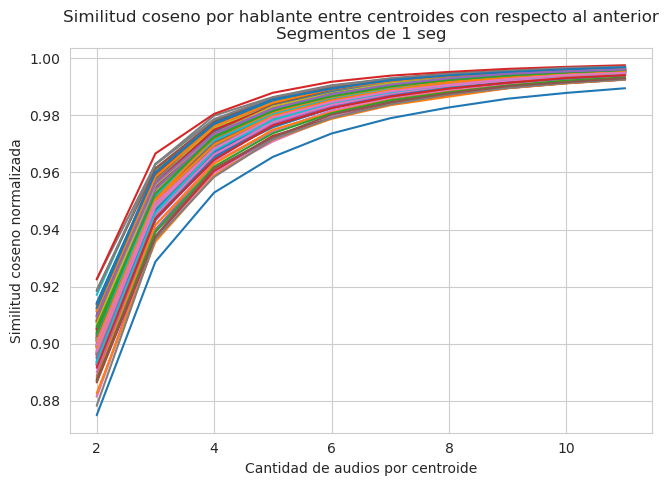

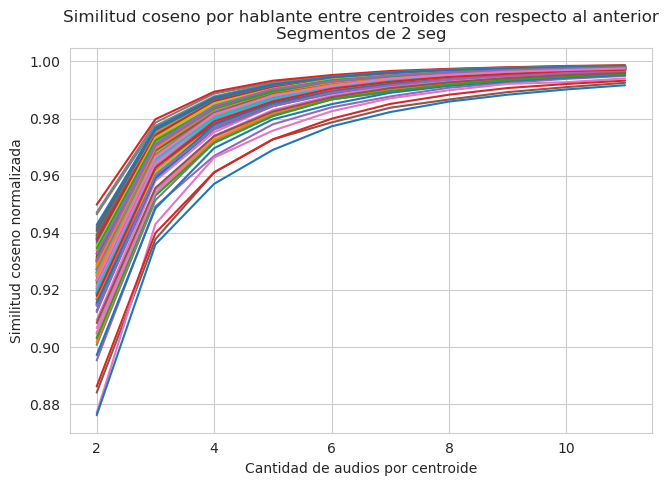

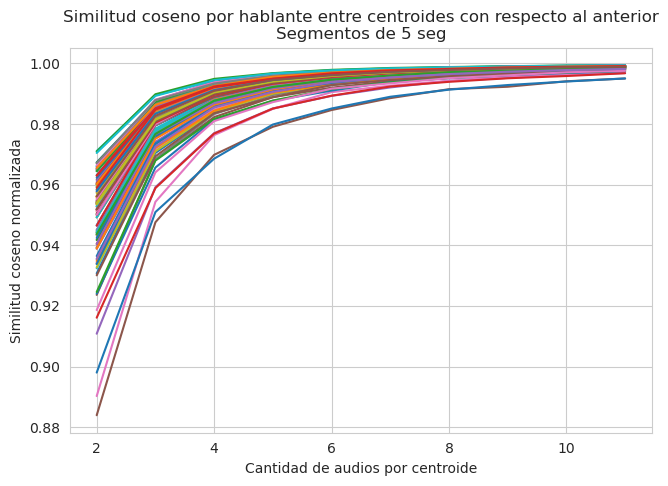

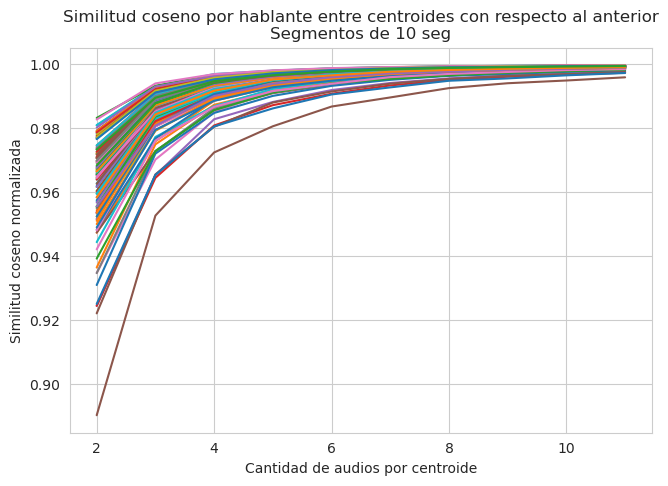

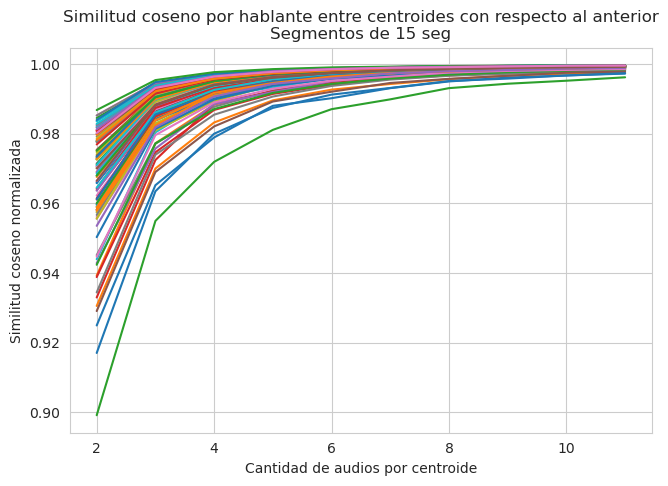

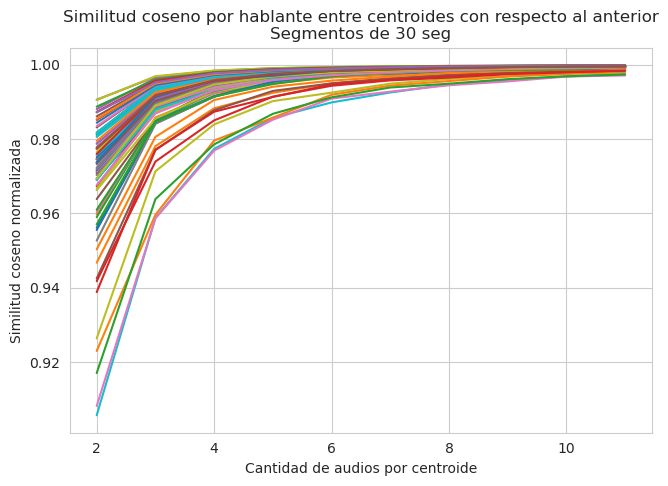

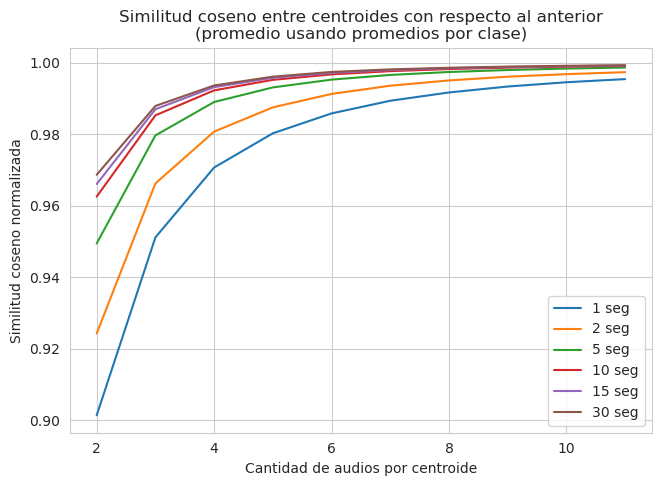

In [9]:
plot_centroid_evolution_by_duration(U, LABEL_VECTORS, DURATIONS, T=10)

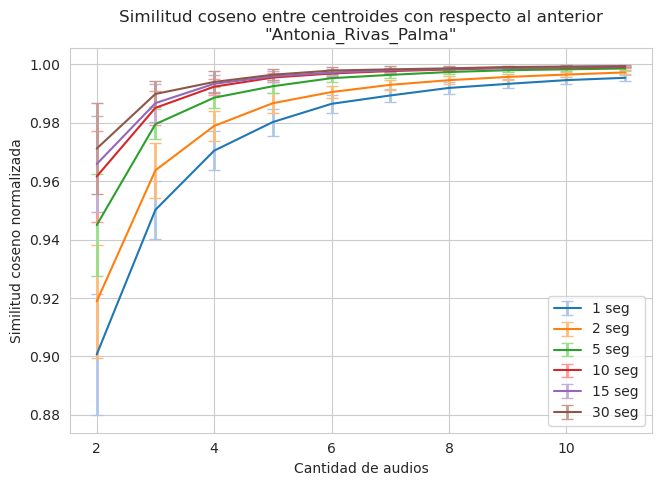

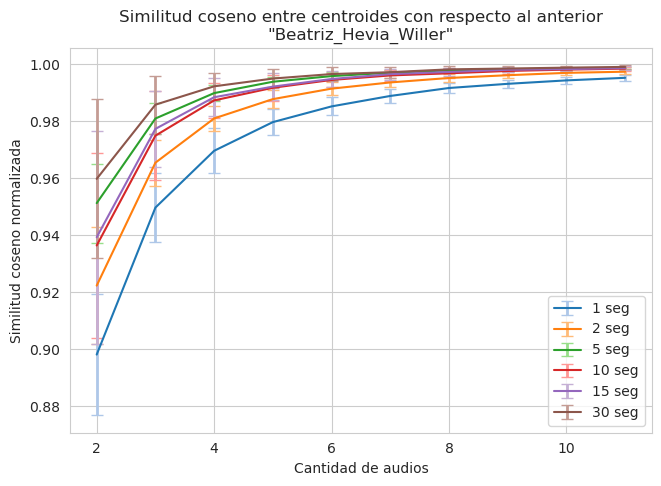

In [10]:
for label in COMMON_LABELS[:2]:
    # Example usage
    fig = plt.figure(figsize=(7.5, 5))
    ax = fig.add_subplot(1, 1, 1)  # Add an Axes to the figure if it doesn't exist
    ax = plot_centroid_evolution_by_label(ax, U, V, DURATIONS, label)

    plt.show()

In [11]:
import warnings

def plot_centroid_kde(means: np.ndarray, k: int):
    """
    Plots a histogram for an element-wise feature in a sequence
    of centroid evolution.
    """
    means = means[:, :, COMMON_LABELS]

    sns.set_style('whitegrid')
    # sns.set_style('white')

    Dur, K_minus_1, N_prime = means.shape
    
    mean = means[:, k, :]
    u = np.array([])
    indexes = []
    for d in range(Dur):
        u = np.append(u, mean[d])
        indexes.extend([f'{DURATIONS[d]} seg'] * N_prime)

    df = pd.DataFrame(dict(u=u, g=indexes))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "u",
        bw_adjust=.5, clip_on=False,
        fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "u", clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, "u")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # Customize x ticks
    custom_ticks = np.linspace(0.86, 1.0, num=8)  # Custom ticks example
    custom_tick_labels = [f"{tick:.2f}" for tick in custom_ticks]

    # Customize x and y ticks
    for ax in g.axes.flat:
        ax.set_xticks(custom_ticks)
        ax.set_xticklabels(custom_tick_labels, size=12)
        ax.xaxis.set_tick_params(which='major', size=7, width=1.5)
        ax.xaxis.set_tick_params(which='minor', size=4, width=1)

    
    # Set a common title for the plot
    g.figure.suptitle(f'Distribución estimada de similitud coseno entre centroides {k+1} y {k+2}', fontsize=14)
    
    # Set a common x-axis label
    g.set_axis_labels("Similitud coseno normalizada", "")

     # Set a common y-axis label
    # g.set_axis_labels("", "Duración del segmento (segundos)")
    
    plt.show()
    return df

# Suppress specific warnings
warnings.filterwarnings("ignore", message=".*tight_layout cannot make axes height.*")
    

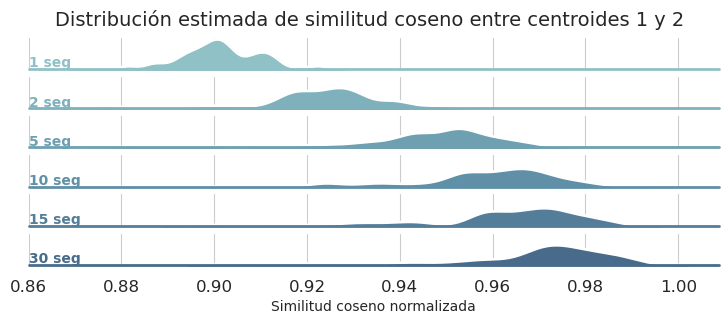

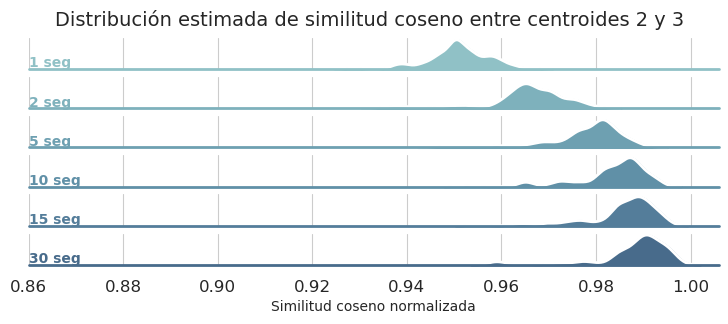

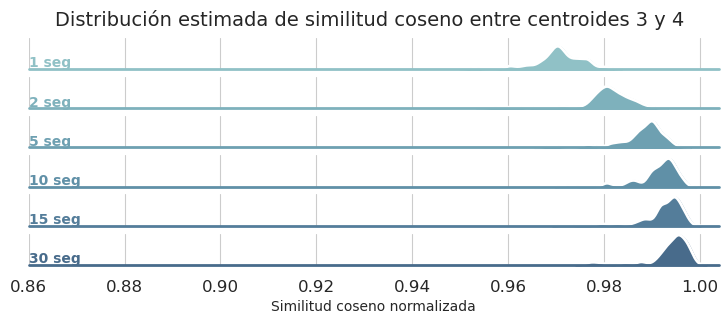

In [12]:
for k in range(3):
    plot_centroid_kde(U, k)

In [13]:
def plot_centroid_evolution_histogram(means: np.ndarray, stds: np.ndarray):
    """
    Plots a histogram for an element-wise feature in a sequence
    of centroid evolution.
    """
    means = means[:, :, COMMON_LABELS]
    max_mean = 1
    min_mean = np.min(means)
    bins_mean = np.linspace(min_mean, max_mean, 25)

    stds = stds[:, :, COMMON_LABELS]
    max_std = np.max(stds)
    min_std = 0
    bins_std = np.linspace(min_std, max_std, 25)

    # sns.set_style('whitegrid')
    sns.set_style('white')

    _, K, _ = means.shape
    for k in range(K):
        mean = means[:, k, :]
        std = stds[:, k, :]
        
        # Plot histograms
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        title = f"""Histogramas de la media y desviación estándar de la similitud coseno
        entre centroides {k+2} y {k+1}"""

        fig.suptitle(title)
        
        # Mean histogram
        ax1.set_title('Media')
        ax1.hist(mean[0], bins=bins_mean, alpha=0.5, label='1 seg', color='gray')
        ax1.hist(mean[1], bins=bins_mean, alpha=0.5, label='2 seg', color='yellow')
        ax1.hist(mean[2], bins=bins_mean, alpha=0.5, label='5 seg', color='blue')
        ax1.hist(mean[3], bins=bins_mean, alpha=0.5, label='10 seg', color='red')
        ax1.hist(mean[4], bins=bins_mean, alpha=0.5, label='15 sec', color='green')
        ax1.hist(mean[5], bins=bins_mean, alpha=0.5, label='30 seg', color='purple')
        
        ax1.set_xlabel('Media')
        ax1.set_ylabel('Frecuencia')
        ax1.legend(loc='upper left')


        # Standard deviation histogram
        ax2.set_title('Desviación estándar')
        ax2.hist(std[0], bins=bins_std, alpha=0.5, label='1 seg', color='gray')
        ax2.hist(std[1], bins=bins_std, alpha=0.5, label='2 seg', color='yellow')
        ax2.hist(std[2], bins=bins_std, alpha=0.5, label='5 seg', color='blue')
        ax2.hist(std[3], bins=bins_std, alpha=0.5, label='10 seg', color='red')
        ax2.hist(std[4], bins=bins_std, alpha=0.5, label='15 sec', color='green')
        ax2.hist(std[5], bins=bins_std, alpha=0.5, label='30 seg', color='purple')

        ax2.set_xlabel('Desviación estándar')
        ax2.set_ylabel('Frecuencia')
        ax2.legend(loc='upper right')

        # Showing plot
        plt.show()
        
    return bins_mean, bins_std

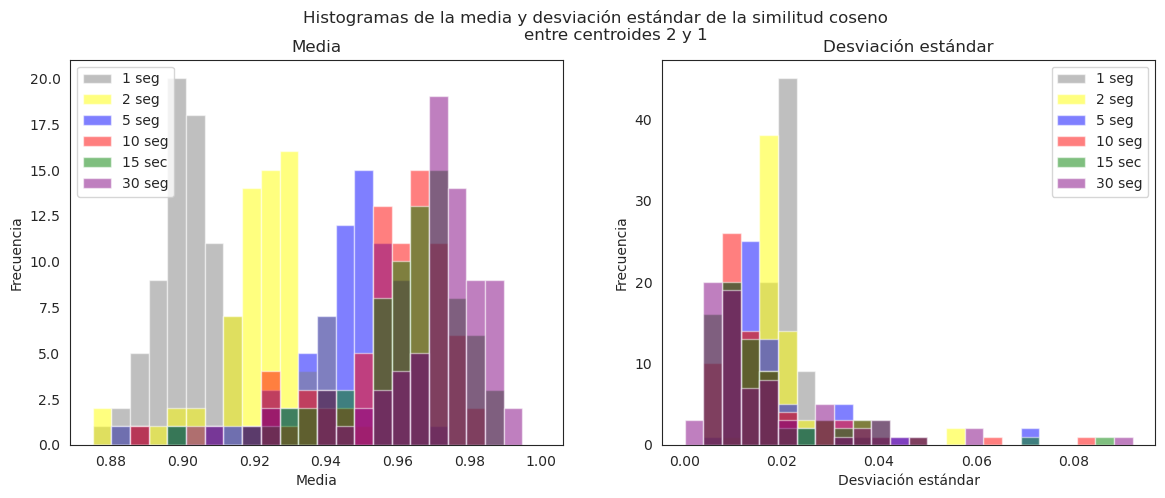

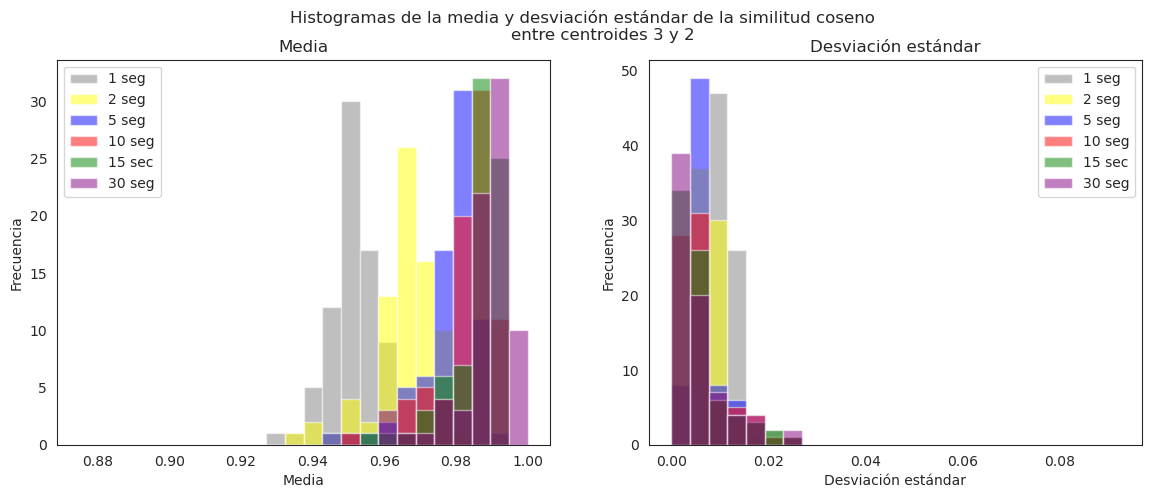

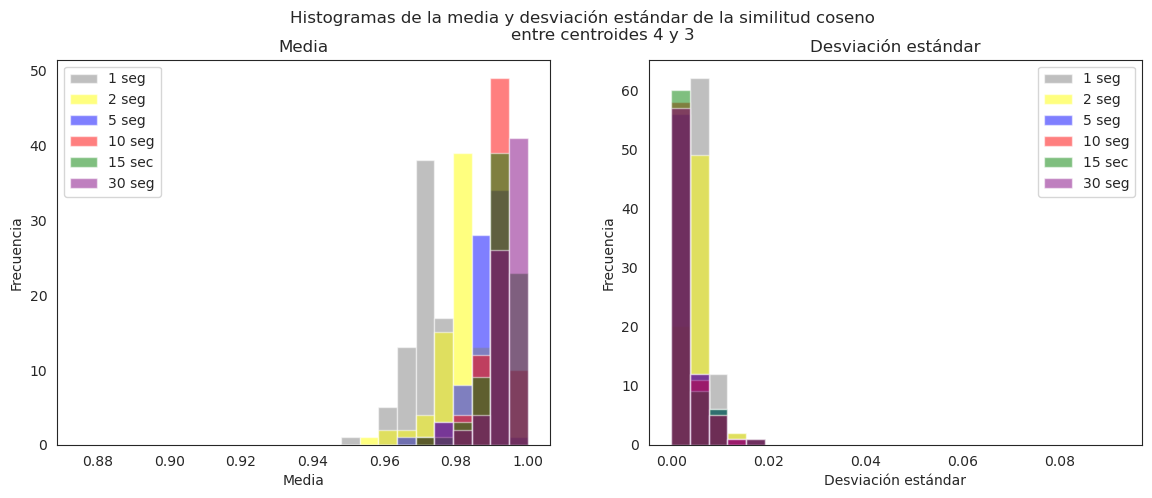

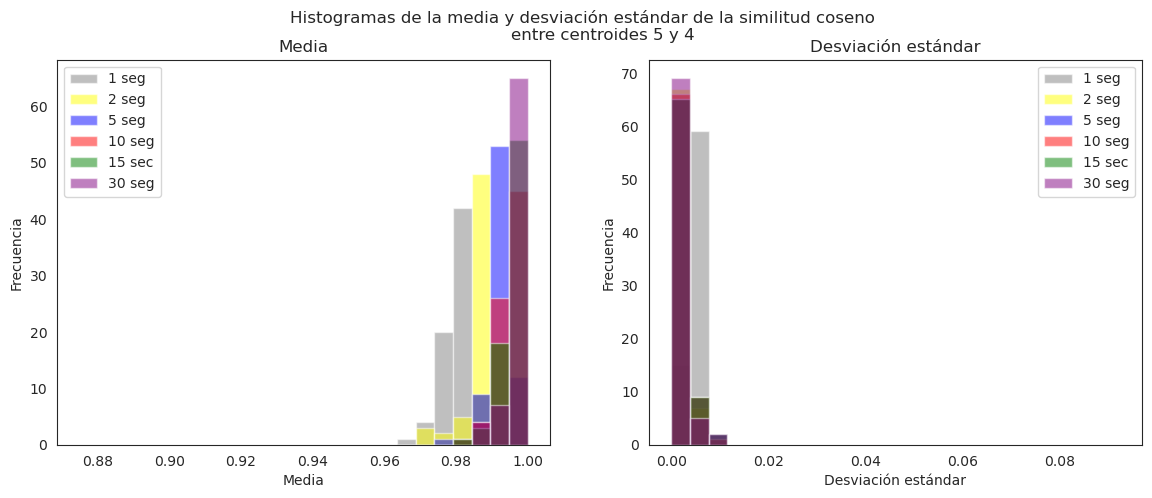

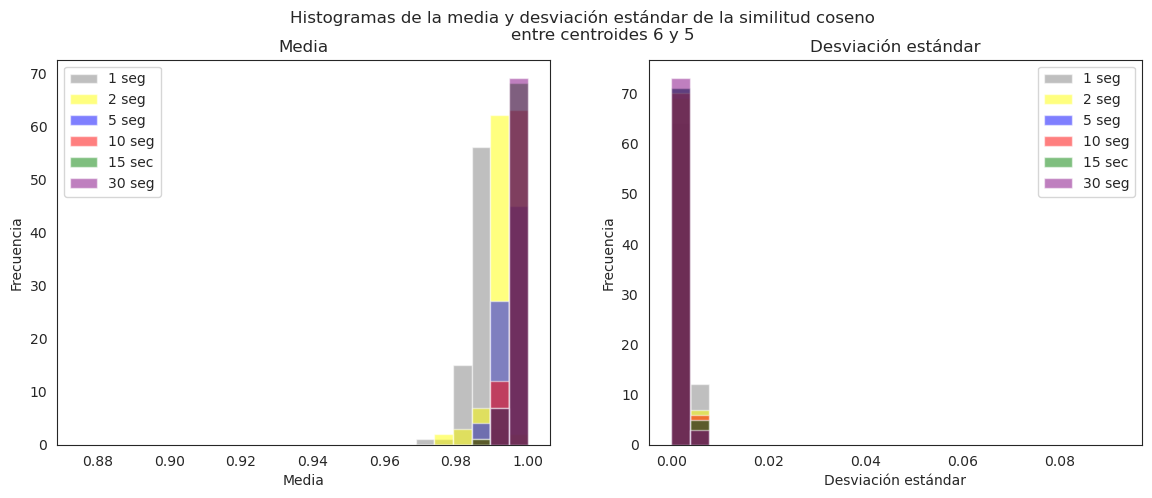

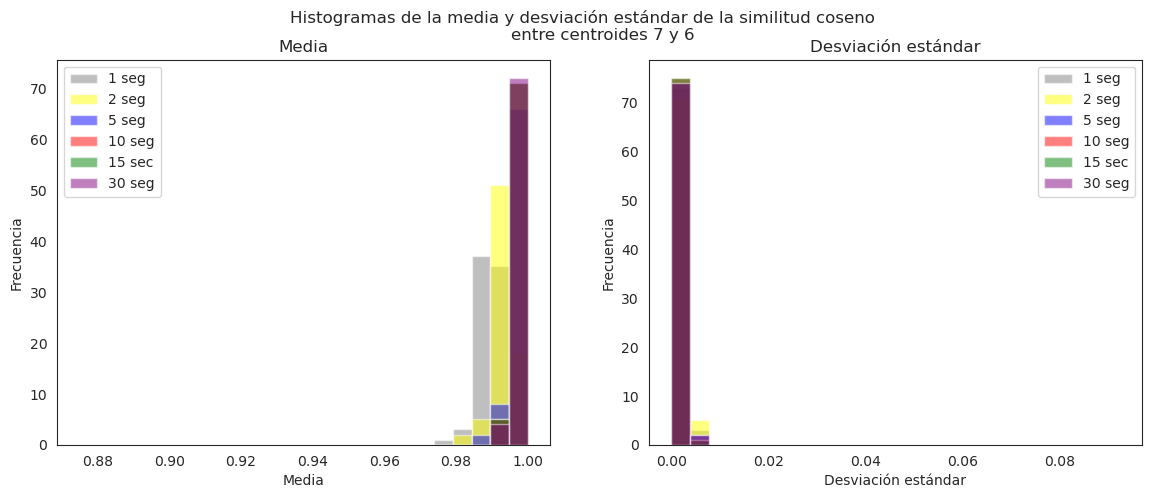

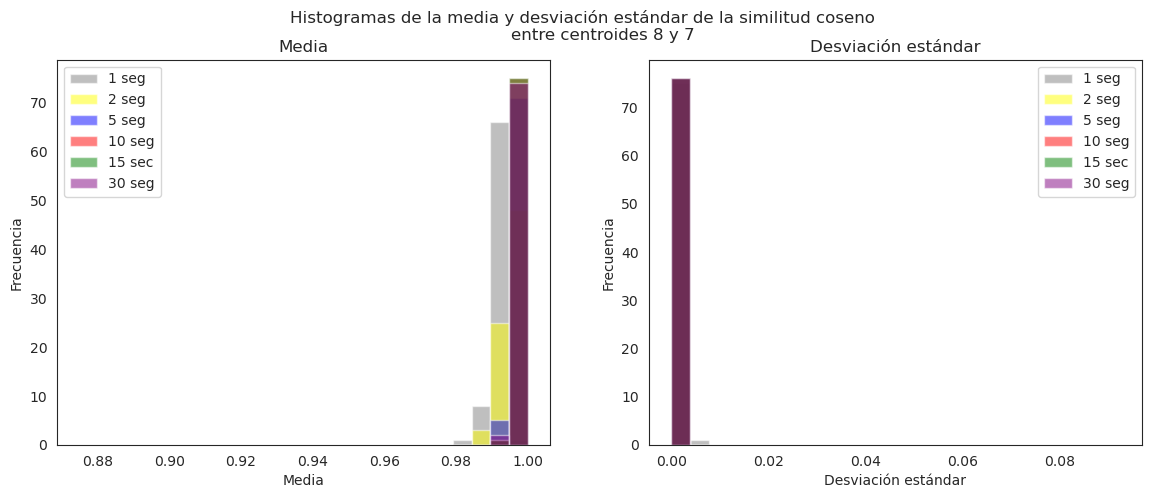

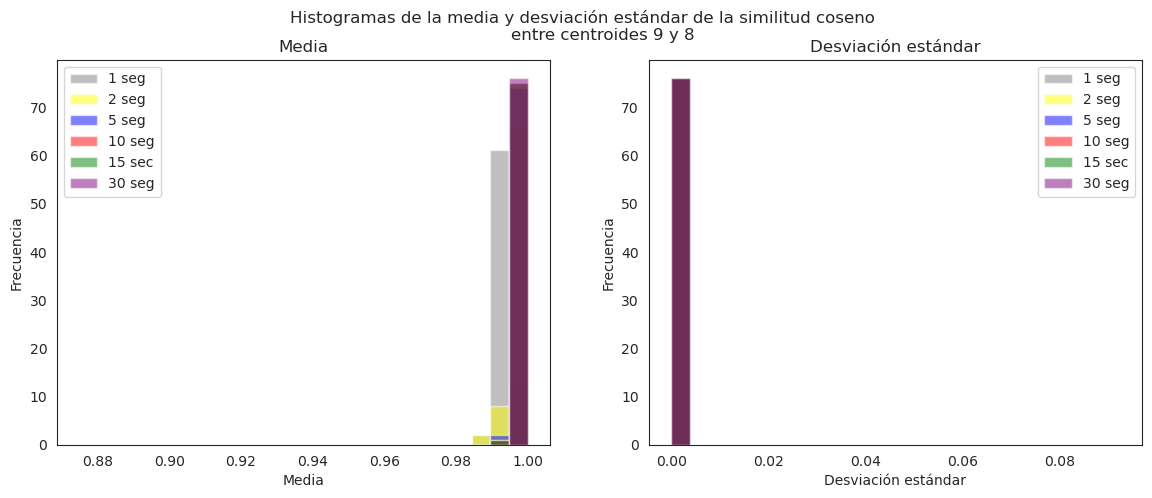

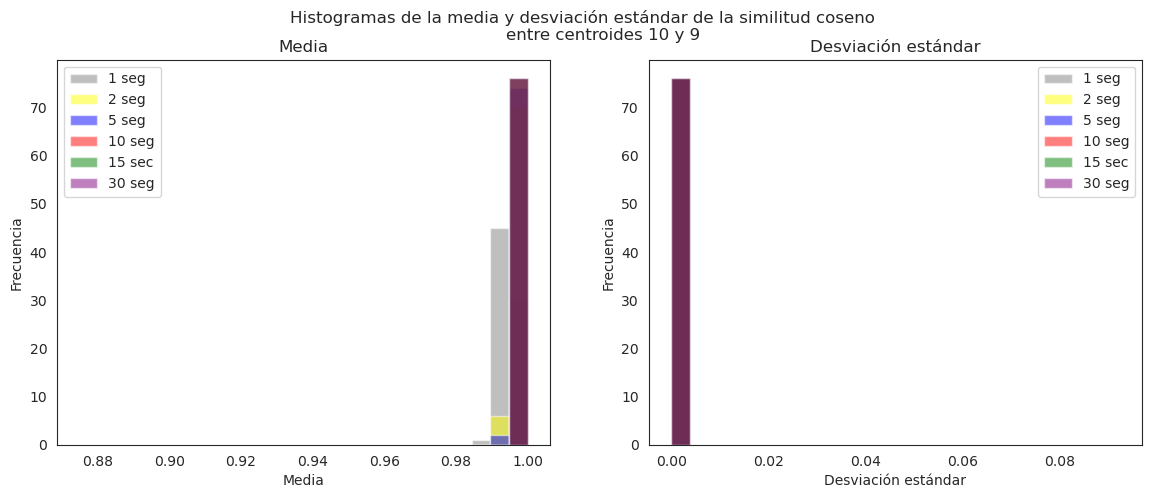

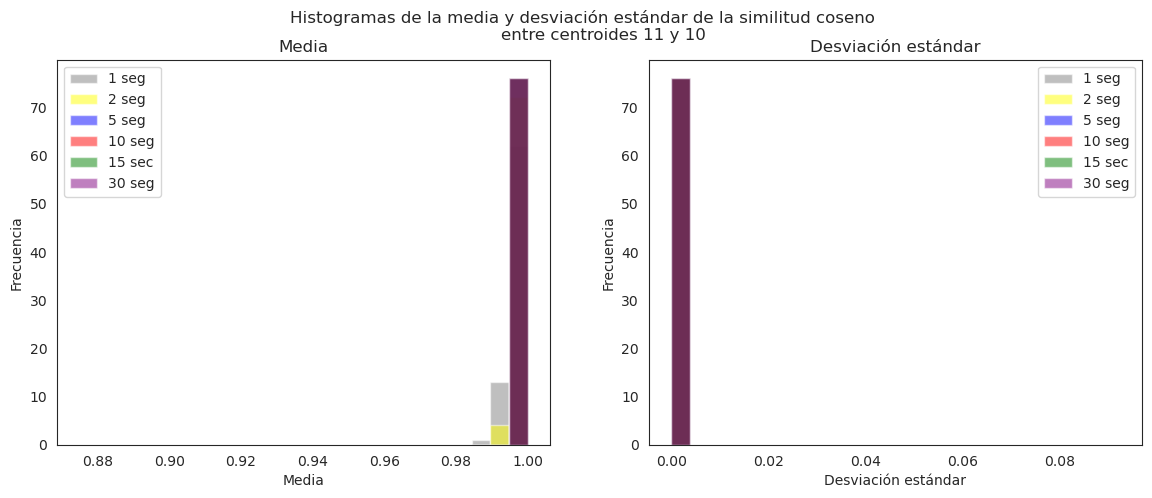

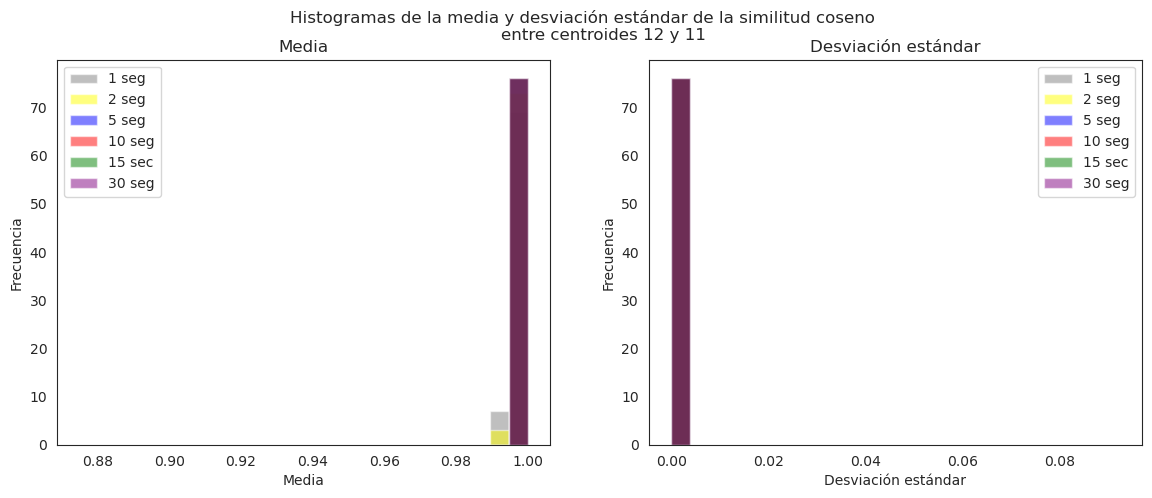

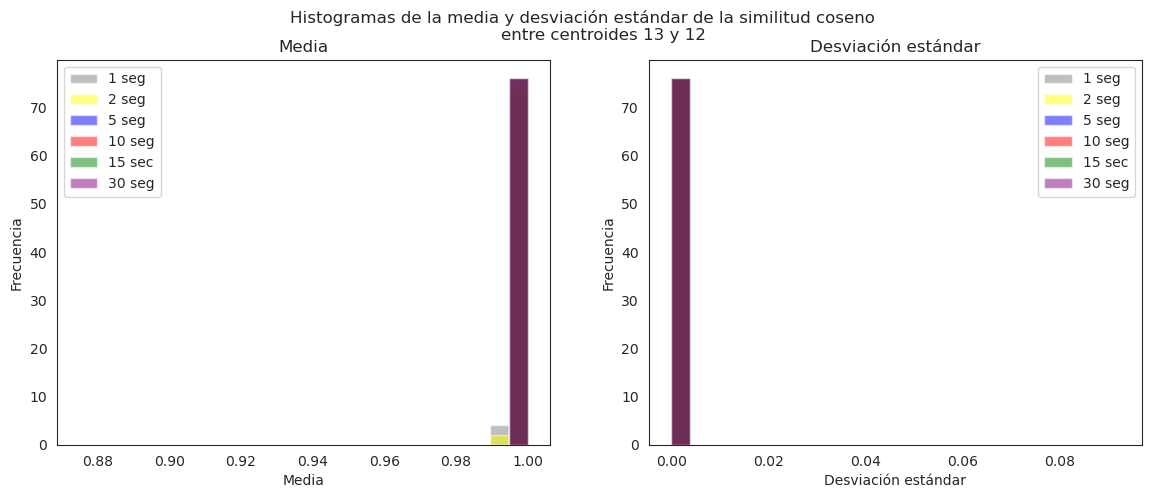

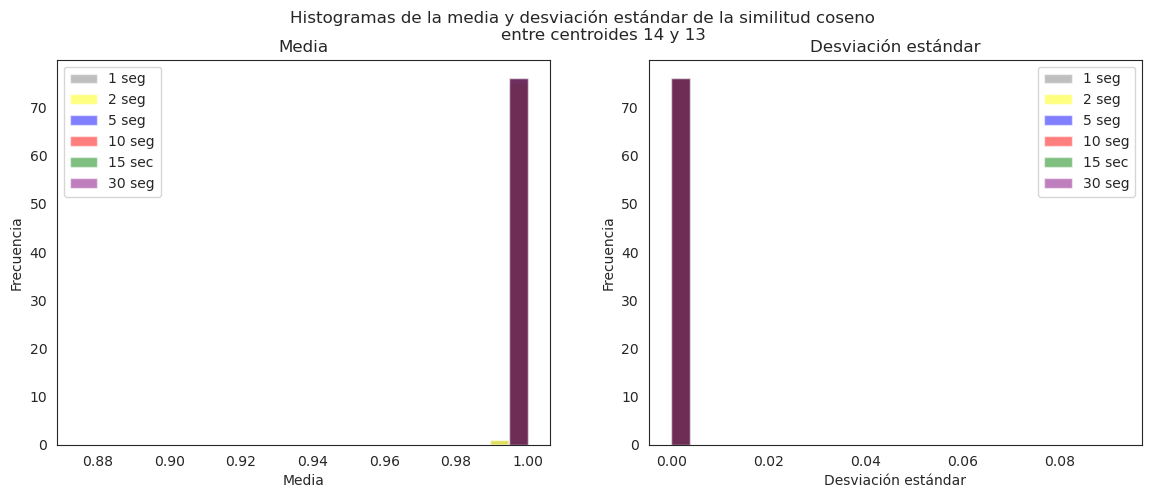

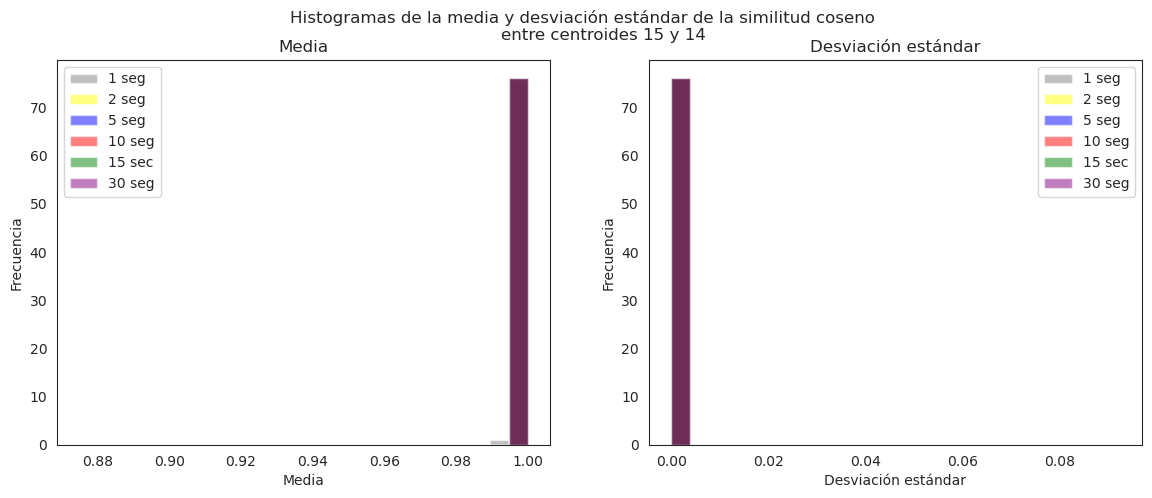

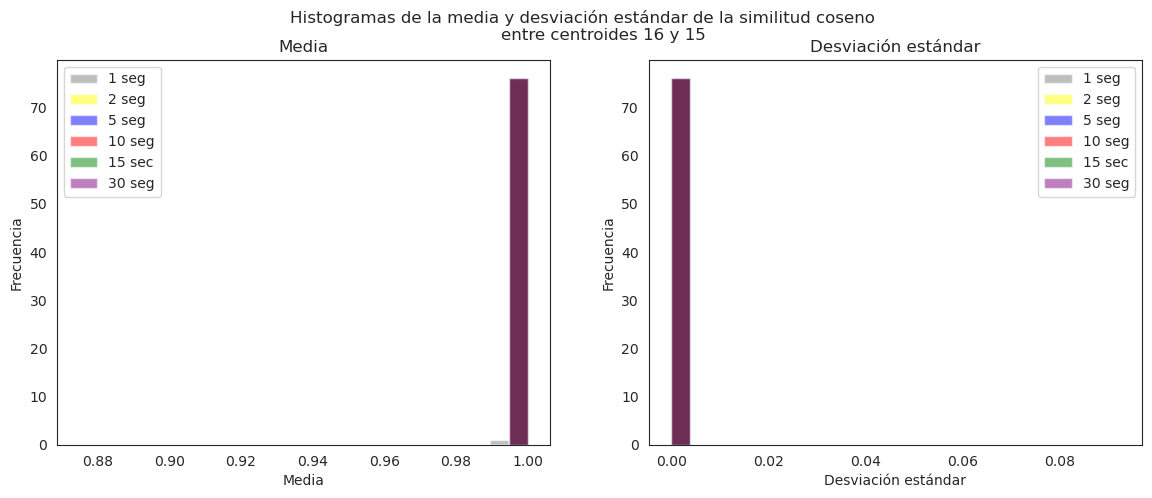

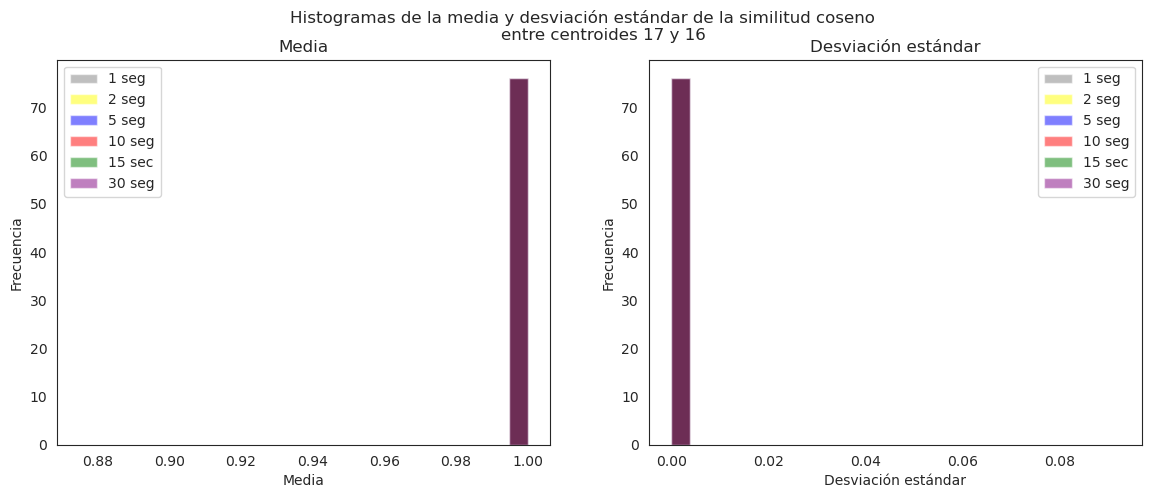

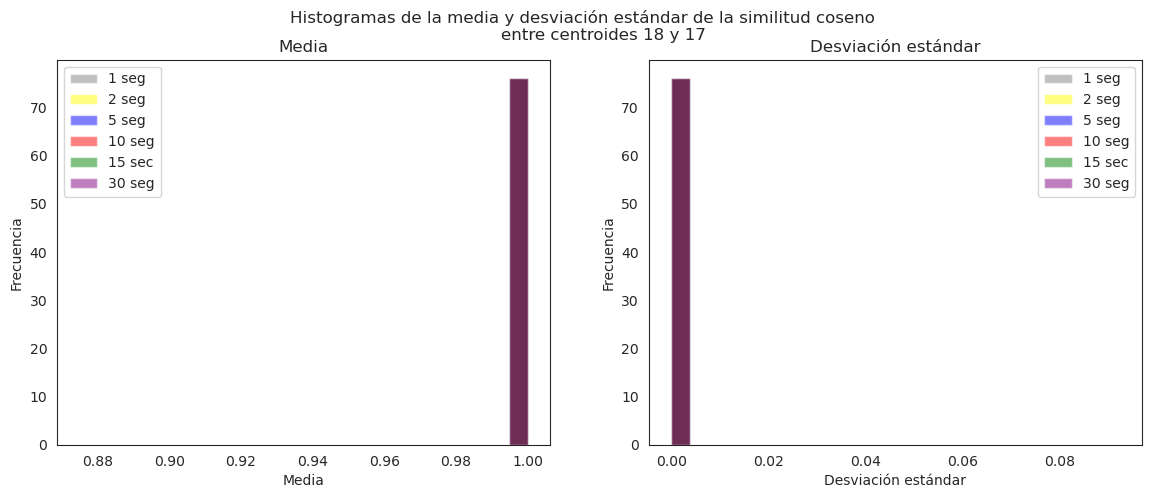

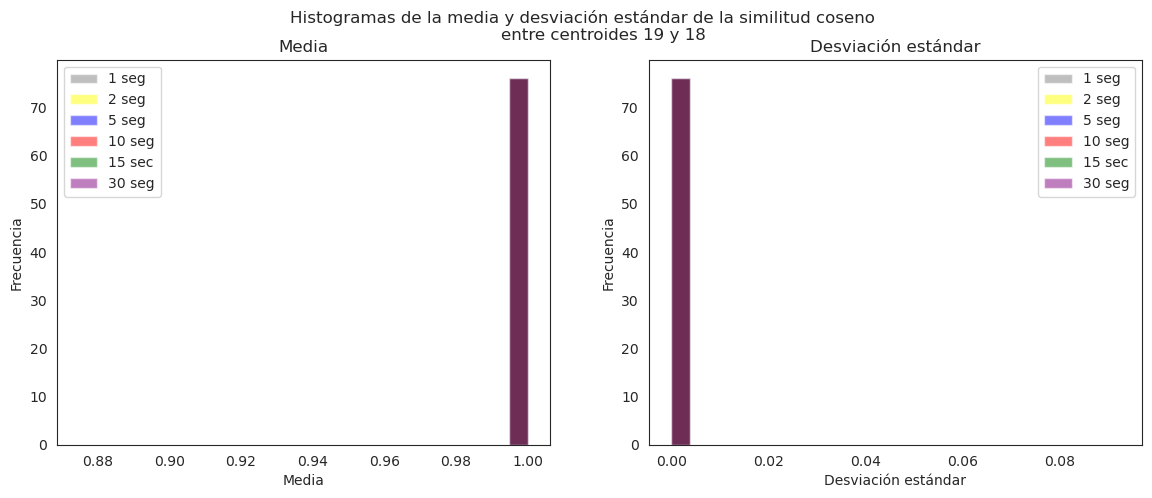

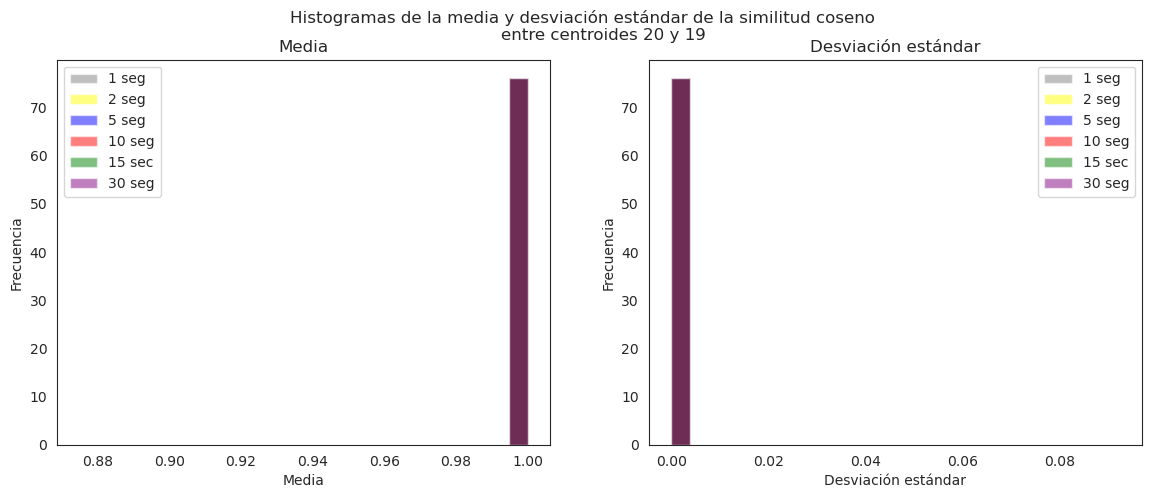

(array([0.87491298, 0.88012494, 0.8853369 , 0.89054886, 0.89576081,
        0.90097277, 0.90618473, 0.91139669, 0.91660865, 0.92182061,
        0.92703257, 0.93224453, 0.93745649, 0.94266845, 0.94788041,
        0.95309237, 0.95830433, 0.96351629, 0.96872824, 0.9739402 ,
        0.97915216, 0.98436412, 0.98957608, 0.99478804, 1.        ]),
 array([0.        , 0.00384349, 0.00768699, 0.01153048, 0.01537397,
        0.01921747, 0.02306096, 0.02690445, 0.03074795, 0.03459144,
        0.03843493, 0.04227842, 0.04612192, 0.04996541, 0.0538089 ,
        0.0576524 , 0.06149589, 0.06533938, 0.06918288, 0.07302637,
        0.07686986, 0.08071336, 0.08455685, 0.08840034, 0.09224384]))

In [14]:
plot_centroid_evolution_histogram(U,V)

---
#### 2.1.2) Stationary State

In [15]:
def compare_last_centroids_by_duration(centroids: np.ndarray, duration: List[int]):
    """
    
    """
    last_centroids = np.empty((len(LABELS), len(duration), 192))
    for i in COMMON_LABELS:
        for d in range(len(centroids)):
            last_centroids[i][d] = centroids[d][i][-1]

    Sc_stationary = np.empty((len(LABELS), len(duration), len(duration)))
    for i in COMMON_LABELS:
        for j in range(len(duration)):
            for k in range(len(duration)):
                Sc_stationary[i][j][k] = cosine_similarity(last_centroids[i][j], last_centroids[i][k])

    return Sc_stationary

def plot_last_centroids_similarity(Sc_stationary: np.ndarray, durations: List[int], n: int = None):
    """
    
    """
    sns.set_style('white')
    mask = np.triu(np.ones_like(Sc_stationary[0], dtype=bool))
    durations_s = [f"{d} seg" for d in durations]

    for i, label in enumerate(COMMON_LABELS):
        if n is not None and i >= n:
            break
        plt.figure(figsize=(7.5, 5))
        plt.title(f'Similitud coseno entre centroides finales\n"{LABELS[label]}"')
        sns.heatmap(Sc_stationary[label], cmap="viridis",
                    cbar_kws={'label': 'Similitud coseno normalizada'},
                    square=True, mask=mask,
                    xticklabels=durations_s, yticklabels=durations_s,
                    vmin=0.7, vmax=1)
        plt.show()

def hist_last_centroids_similarity(Sc_stationary: np.ndarray):
    """
    
    """
    sims = []
    mask = np.triu(np.ones_like(Sc_stationary[0], dtype=bool) ^ np.eye(6, dtype=bool))
    for i in COMMON_LABELS:
        sims.append(Sc_stationary[i][mask])  # Append all pairs of similarities
    sims = np.array(sims).flatten()
    
    # Calculate the histogram
    counts, bins = np.histogram(sims, bins=np.arange(0.65, 1.01, 0.025))
    
    # Calculate percentages
    percentages = counts / np.sum(counts) * 100
    
    sns.set_style('whitegrid')
    
    # Linear scale histogram with percentages
    plt.figure(figsize=(8, 5))
    plt.title(f'Histograma de similitud coseno entre centroides finales\nde un mismo hablante para distintas duraciones\n(Escala lineal)')
    plt.xlabel('Similitud coseno normalizada')
    plt.ylabel('Frecuencia')
    
    plt.bar(bins[:-1], counts, width=0.025, align='edge', alpha=0.6, label='Escala lineal')
    
    for bin_edge, cnt, pct in zip(bins[:-1], counts, percentages):
        plt.text(bin_edge + 0.0125, cnt, f'{pct:.2f}%', ha='center', va='bottom', fontsize=8)
    
    plt.show()

    # Log scale histogram
    plt.figure(figsize=(8, 5))
    plt.title(f'Histograma de similitud coseno entre centroides finales\nde un mismo hablante para distintas duraciones\n(Escala logarítmica)')
    plt.xlabel('Similitud coseno normalizada')
    plt.ylabel('log10(Frecuencia)')

    counts_log = counts.copy()
    counts_log[counts_log == 0] = 1  # Avoid calculation of log(0)

    plt.bar(bins[:-1], np.log10(counts_log), width=0.025, align='edge', alpha=0.6, label='Escala logarítmica')
    # plt.stairs(, bins, fill=True, alpha=0.5)  # Plot the histogram in log scale
    plt.show()
    
    return sims, counts, bins

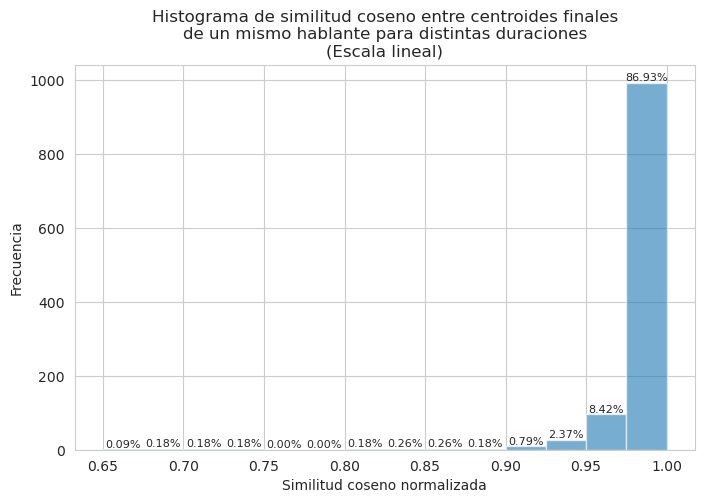

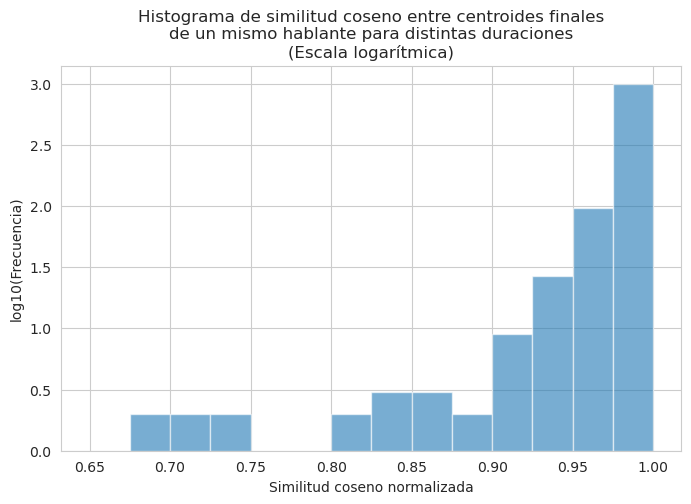

In [16]:
Sc_stationary = compare_last_centroids_by_duration(C, DURATIONS)
sims, counts, bins = hist_last_centroids_similarity(Sc_stationary)

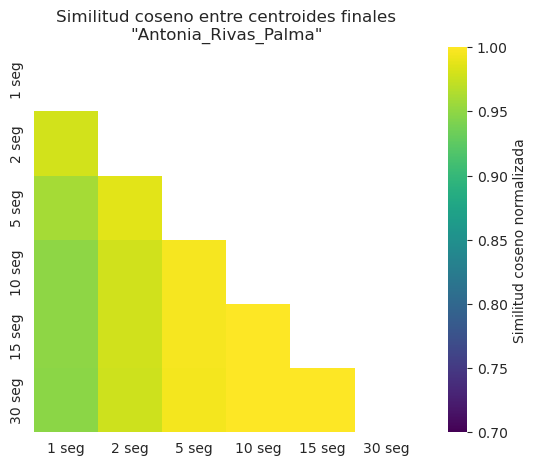

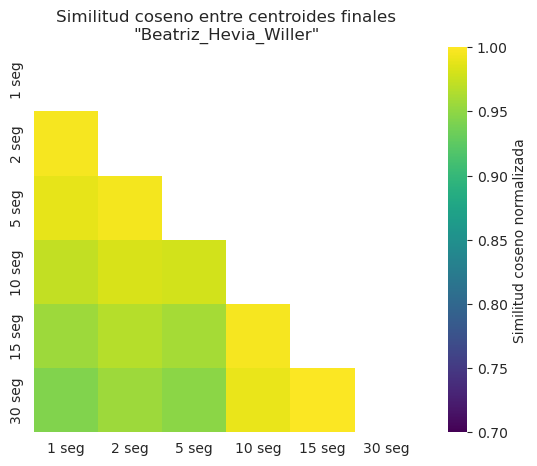

In [17]:
plot_last_centroids_similarity(Sc_stationary, DURATIONS, 2)

In [18]:
# plt.figure(figsize=(7.5, 5))
# plt.plot([3], [0.99], label='Masculino', c='orange')
# plt.plot([3], [0.99], label='Femenino',c='purple')
# for label in common_labels:
#     color = 'orange' if label in male else 'purple'
#     plt.plot(idx[:16], sims_df[f'{label}_mean'][:16], color, alpha=0.8)
#     plt.xlabel('Cantidad de audios')
#     plt.ylabel('Similitud coseno normalizada')
#     plt.title(f'Similitud coseno entre centroides sucesivos')
#     plt.legend(title='Género', loc='lower right')

---
### 2.2) Interclass Centroid Evolution

We will calculate the similarities between centroids of `N` different speakers at each iteration `k` for all 6 datasets. <br>
The results will be saved in a 4D array `interclass_similarities` of shape $(6, K, N, N)$.<br>

For datasets with less than $N$ = 127 speakers (where $n \notin \{1, 2, \cdots N_d\}$), the $n$-th rows and columns along the<br>
third and fourth dimension contain a very small value to avoid divisions by zero.

![Graphic representation of `interclass_similarities`](/home/edu/sr-study/img/inter-sim.png)

*Graphic representation of `interclass_similarities`*

In [19]:
def get_interclass_similarities(C_d: np.ndarray, label_nums_d: List[int]):
    """
    Computes the cosine similarity between the centroids of different classes for
    each of the K iterations, for segments of duration d.

    Args:
        C_d: The centroids of each class for each iteration for duration d.
        label_nums_d: The labels of the set with segments of duration d.
    """
    N = len(LABELS)
    # centroids = C_d[label_nums_d]  # Get centroids of valid classes for each duration
    N_prime, K, _ = C_d.shape  # N' speakers, K iterations, D dimensions
    interclass_similarities = np.zeros((K, N, N))


    for k in range(K):
        centroids_k = C_d[:, k]
        for i in range(N):
            for j in range(N):
                if i in label_nums_d and j in label_nums_d:  # If both labels are valid for set d
                    sim = cosine_similarity(centroids_k[i], centroids_k[j])
                else: 
                    sim = 1e-10  # Set an arbitrary small value for invalid classes
                
                interclass_similarities[k, i, j] = sim

    return interclass_similarities

def plot_max_interclass_similarity(interclass_similarities: List[np.ndarray]):
    """
    Plots the maximum difference interclass similarity for each iteration.
    """
    sns.set_style('whitegrid')
    plt.figure(figsize=(7.5, 5))
    plt.title('Máxima diferencia entre similitudes coseno de centroides interclase por iteración\ncon respecto a la anterior')
    plt.xlabel('Cantidad de audios')
    plt.ylabel('Diferencia máxima (valor absoluto)')

    K = interclass_similarities[0].shape[0]
    
    for i in range(len(interclass_similarities)):
        inter_sim = interclass_similarities[i]
        
        # Calculate the maximum difference between each pair of iterations
        maximums = []
        for k in range(K-1):
            m = np.max(abs(inter_sim[k] - inter_sim[k+1]))
            maximums.append(m)
        plt.plot(np.arange(2, K+1), maximums, label=f'{DURATIONS[i]} seg')
    
    plt.xticks(np.arange(2, K+1, 2))
    plt.legend()
    plt.show()

Computation of interclass similarities between centroids:

In [20]:
interclass_similarities = []
for i in range(len(C)):    
    interclass_similarities.append(get_interclass_similarities(C[i], LABEL_NUMS[i]))

interclass_similarities = np.array(interclass_similarities)   

In [21]:
interclass_similarities.shape

(6, 20, 127, 127)

Plotting the maximum difference in interclass similarity for each iteration:

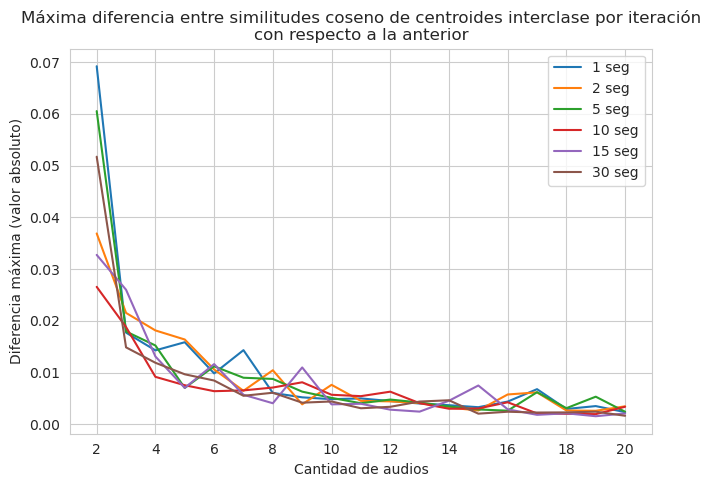

In [22]:
plot_max_interclass_similarity(interclass_similarities)

In [23]:
interclass_similarities.shape

(6, 20, 127, 127)

In [24]:
def plot_intercentroid_sim_kde(interclass_similarities: np.ndarray, k: int):
    """
    Plots a histogram for an element-wise feature in a sequence
    of centroid evolution.
    """
    sims = np.array([])
    indexes = []
    for d, inter_sim in enumerate(interclass_similarities):
        
        # Interclass similarities of centroids calculated with k audios
        last_inter_sim = inter_sim[k]  

        # We consider only the valid labels for duration d
        valid_labels = LABEL_NUMS[d]  
        last_inter_sim = last_inter_sim[np.ix_(valid_labels, valid_labels)]

        # We use a mask to extract all items below the diagonal (to avoid duplicates and cos_sim = 1)
        N_prime = len(valid_labels)
        mask = np.triu(np.ones(N_prime, dtype=bool) ^ np.eye(N_prime, dtype=bool))
        last_inter_sim = last_inter_sim[mask]

        sims = np.append(sims, last_inter_sim)
        indexes.extend([f'{DURATIONS[d]} seg'] * len(last_inter_sim))
        
    df = pd.DataFrame(dict(x=sims, g=indexes))

    # return df

    sns.set_style('whitegrid')
    # sns.set_style('white')

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x",
        bw_adjust=.5, clip_on=False,
        fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, "x")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # Customize x and y ticks
    for ax in g.axes.flat:
        ax.xaxis.set_tick_params(which='major', size=7, width=1.5)
        ax.xaxis.set_tick_params(which='minor', size=4, width=1)

    
    # Set a common title for the plot
    g.figure.suptitle(f'Distribución estimada de similitud coseno entre centroides {k+1} y {k+2}', fontsize=14)
    
    # Set a common x-axis label
    g.set_axis_labels("Similitud coseno normalizada", "")

    
    plt.show()

# Suppress specific warnings
warnings.filterwarnings("ignore", message=".*tight_layout cannot make axes height.*")

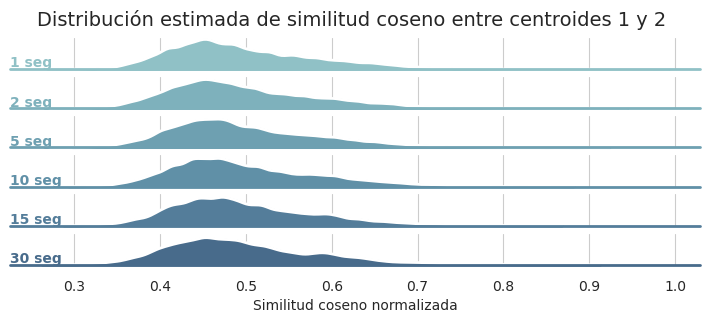

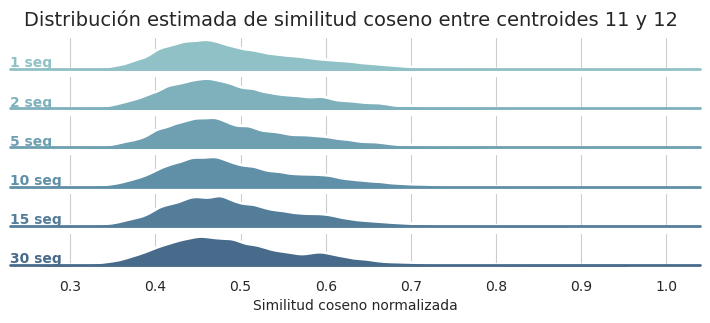

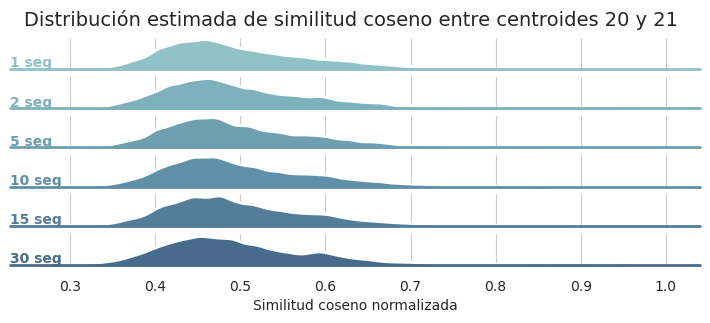

In [25]:
for k in [0, 10, 19]:
    plot_intercentroid_sim_kde(interclass_similarities, k)

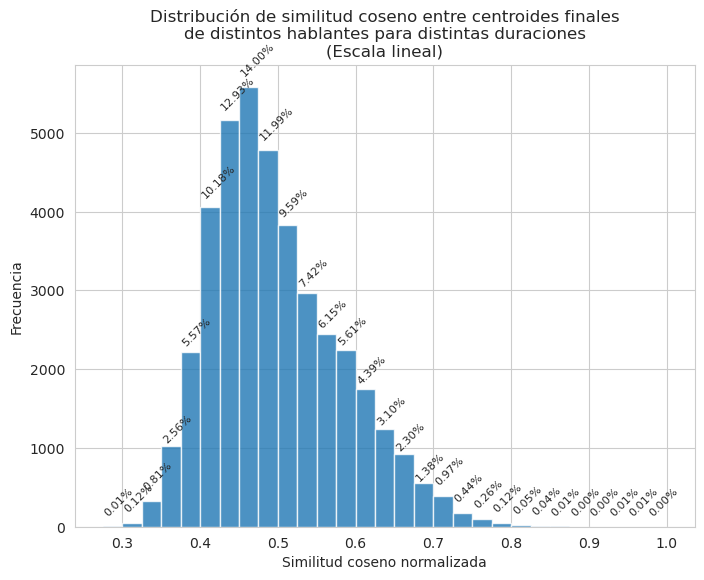

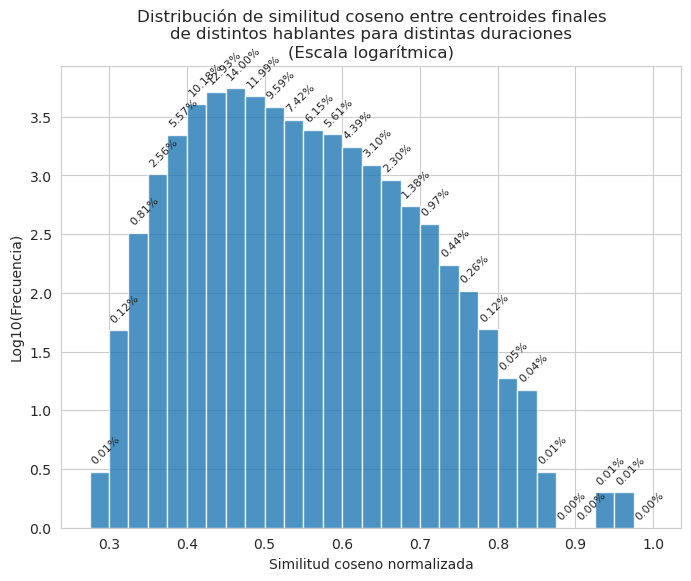

In [26]:
bins = np.arange(0.275, 1.001, 0.025)
sims = np.array([])
for d, inter_sim in enumerate(interclass_similarities):
    K, N, _ = inter_sim.shape
    mask = np.triu(np.ones(N, dtype=bool) ^ np.eye(N, dtype=bool))
    last_inter_sim = inter_sim[k]  # Interclass similarities of centroids calculated with k audios
    last_inter_sim = last_inter_sim[mask]
    sims = np.append(sims, last_inter_sim)

counts, bins = np.histogram(sims, bins)

sns.set_style('whitegrid')
# sns.set_style('white')

# Linear scale histogram with percentages
plt.figure(figsize=(8, 6))
plt.title(f'Distribución de similitud coseno entre centroides finales\nde distintos hablantes para distintas duraciones\n(Escala lineal)')
plt.xlabel('Similitud coseno normalizada')
plt.ylabel('Frecuencia')

plt.bar(bins[:-1], counts, width=0.025, align='edge', alpha=0.8)

# Calculate percentages
percentages = counts / np.sum(counts) * 100

# Plot percentages without overlap and with rotation
rotation_angle = 45  # Set the desired rotation angle

for bin_edge, cnt, pct in zip(bins[:-1], counts, percentages):
    if cnt > 0:
        text_y = cnt + (max(counts) * 0.02 if cnt < 500 else cnt * 0.02)  # Adjust vertical position for low counts
        # plt.text(bin_edge + 0.0125, text_y, f'{pct:.2f}%', ha='center', va='bottom', fontsize=8, rotation=rotation_angle)
        plt.text(bin_edge, text_y, f'{pct:.2f}%', ha='left', va='bottom', fontsize=8, rotation=rotation_angle)
    

# Log scale histogram with percentages
counts[counts == 0] = 1  # Avoid calculation of log(0)

plt.figure(figsize=(8, 6))
plt.title(f'Distribución de similitud coseno entre centroides finales\nde distintos hablantes para distintas duraciones\n(Escala logarítmica)')
plt.xlabel('Similitud coseno normalizada')
plt.ylabel('Log10(Frecuencia)')

plt.bar(bins[:-1], np.log10(counts), width=0.025, align='edge', alpha=0.8)


# Plot percentages without overlap and with rotation
rotation_angle = 45  # Set the desired rotation angle

for bin_edge, cnt, pct in zip(bins[:-1], counts, percentages):
    if cnt > 0:
        text_y = np.log10(cnt) + 0.05  # Adjust vertical position for low counts
        # plt.text(bin_edge + 0.0125, text_y, f'{pct:.2f}%', ha='center', va='bottom', fontsize=8, rotation=rotation_angle)
        plt.text(bin_edge, text_y, f'{pct:.2f}%', ha='left', va='bottom', fontsize=8, rotation=rotation_angle)
    

    


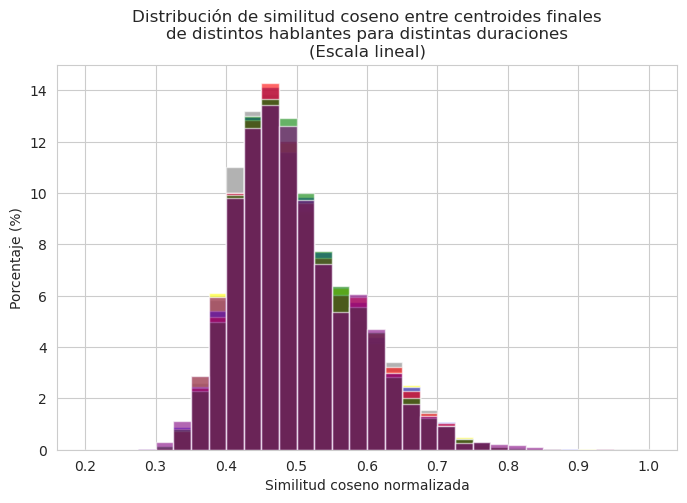

In [27]:
percentages = []
bins = np.arange(0.2, 1.01, 0.025)
for inter_sim in interclass_similarities:
    K, N, _ = inter_sim.shape
    mask = np.triu(np.ones(N, dtype=bool) ^ np.eye(N, dtype=bool))
    last_inter_sim = inter_sim[-1]  # Interclass similarities of centroids calculated with K=20 audios
    last_inter_sim = last_inter_sim[mask]
    counts, _ = np.histogram(last_inter_sim, bins)
    pctg = counts / np.sum(counts) * 100
    percentages.append(pctg)

sns.set_style('whitegrid')

# Linear scale histogram with percentages
plt.figure(figsize=(8, 5))
plt.title(f'Distribución de similitud coseno entre centroides finales\nde distintos hablantes para distintas duraciones\n(Escala lineal)')
plt.xlabel('Similitud coseno normalizada')
plt.ylabel('Porcentaje (%)')

plt.bar(bins[:-1], percentages[0], width=0.025, align='edge', alpha=0.6, label='1 seg', color='gray')
plt.bar(bins[:-1], percentages[1], width=0.025, align='edge', alpha=0.6, label='2 seg', color='yellow')
plt.bar(bins[:-1], percentages[2], width=0.025, align='edge', alpha=0.6, label='5 seg', color='blue')
plt.bar(bins[:-1], percentages[3], width=0.025, align='edge', alpha=0.6, label='10 seg', color='red')
plt.bar(bins[:-1], percentages[4], width=0.025, align='edge', alpha=0.6, label='15 seg', color='green')
plt.bar(bins[:-1], percentages[5], width=0.025, align='edge', alpha=0.6, label='30 seg', color='purple')

plt.show()


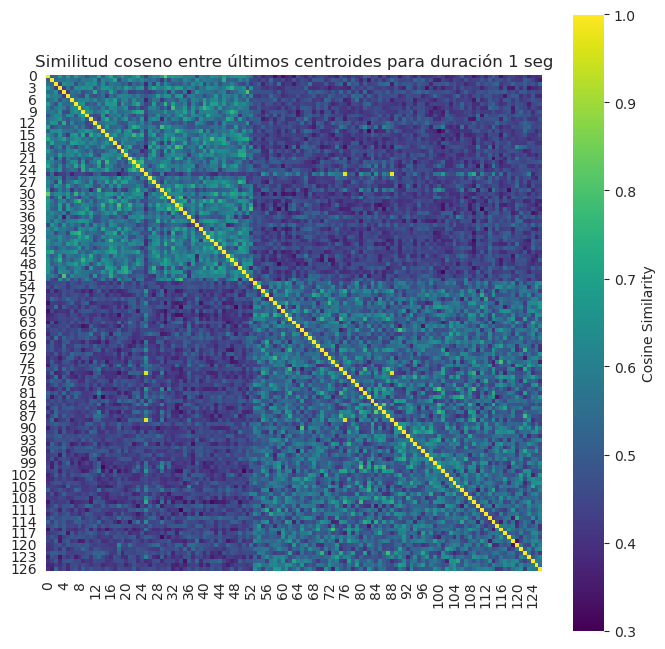

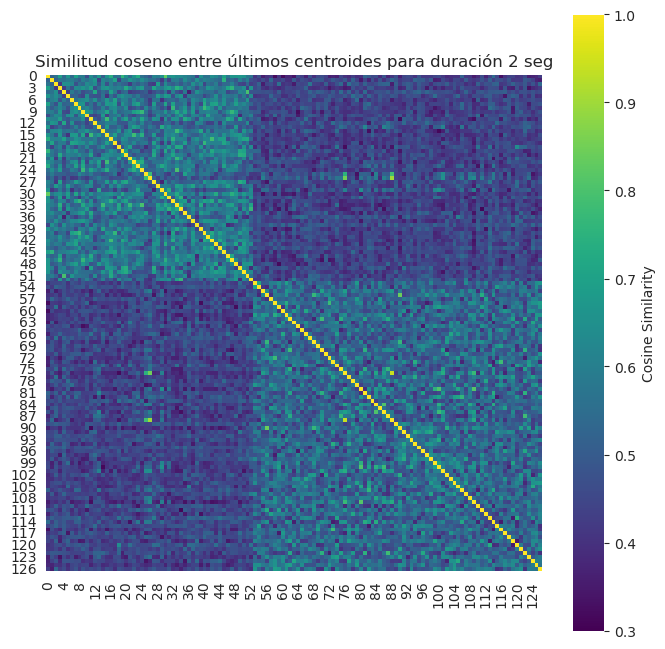

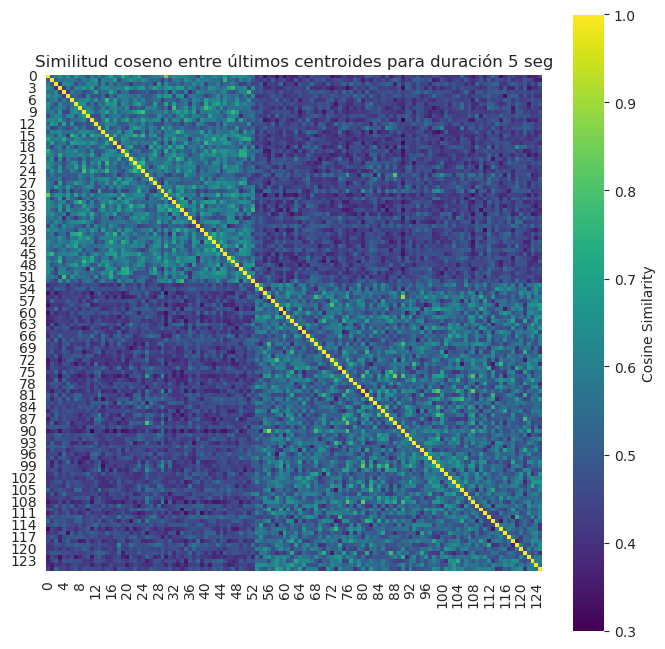

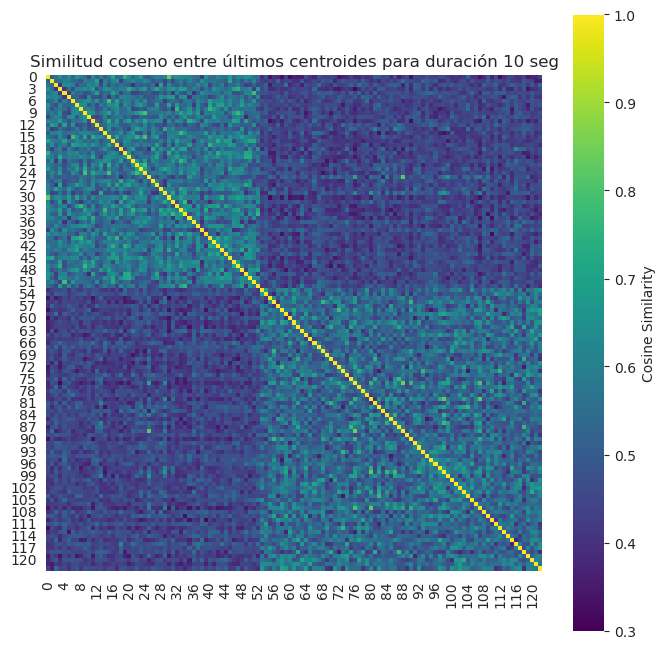

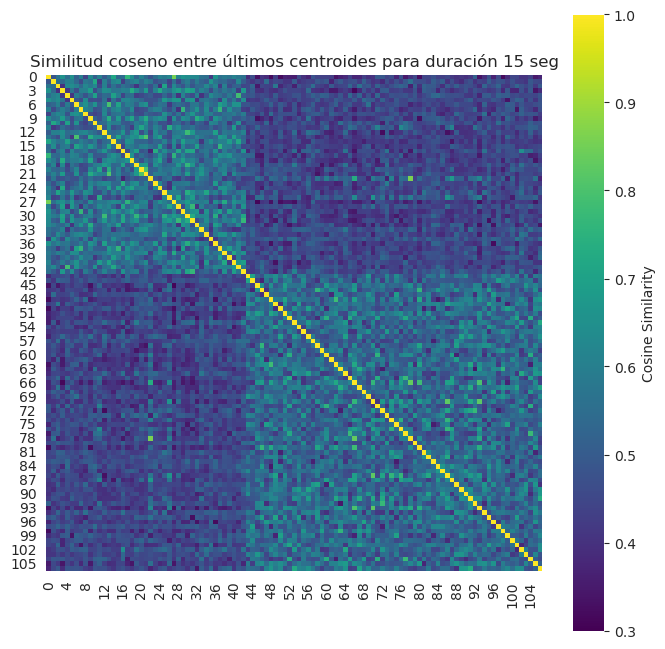

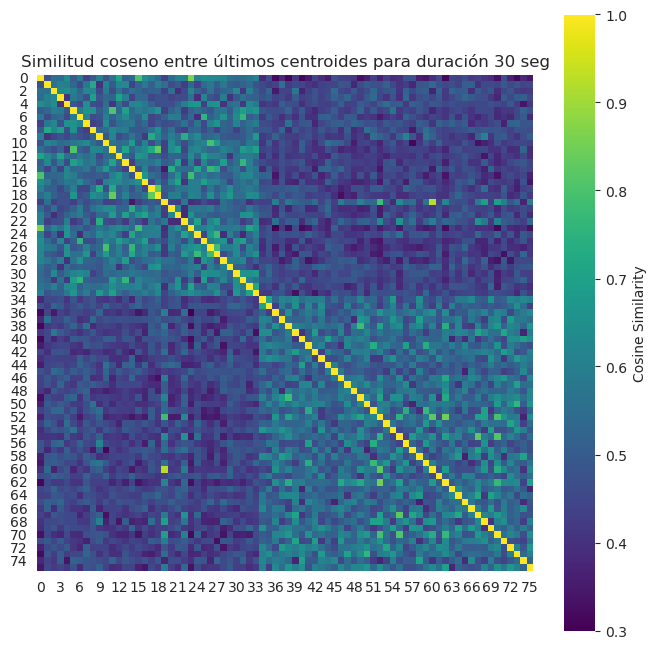

In [28]:
for d in range(len(DURATIONS)):
    plt.figure(figsize=(8, 8))
    inter_sim = interclass_similarities[d][-1]
    inter_sim = inter_sim[np.ix_(LABEL_NUMS[d], LABEL_NUMS[d])]
    sns.heatmap(inter_sim, vmin=0.3, vmax=1, cmap="viridis", cbar_kws={'label': 'Cosine Similarity'}, square=True)
    plt.title(f'Similitud coseno entre últimos centroides para duración {DURATIONS[d]} seg')
    plt.show()

In [29]:
print(LABELS[24])
print(LABELS[76])
print(LABELS[88])

Maria_Claudia_Jorquera_Coria
Jose_Sebastian_Soto_Velasco
Secretario_Luis_Rojas


Speakers `24`, `76` and `88` get confused

`"Maria_Claudia_Jorquera_Coria"`, `"Jose_Sebastian_Soto_Velasco"` and `"Secretario_Luis_Rojas"`



---
## 4) Interclass distribution with respect to own centroids

---
## 5) Verification Experiments

In [30]:
def identify_single_embedding(embedding: np.ndarray, centroids: np.ndarray):
    """
    Classifies a single embedding by assigning it to the nearest centroid in terms of cosine similarity.
    If the similarity is below the threshold, the embedding is classified as unknown.

    Args:
        embedding: The embedding to classify.
        centroids: The centroids to compare the embedding to.

    Returns:
        prediction (int): The label of the nearest centroid.
    """
    similarities = np.array([cosine_similarity(embedding, centroid) for centroid in centroids])
    prediction = np.argmax(similarities)  # Sort the args of similarities in descending order
   
    return prediction, similarities[prediction]
           
            
def identify_embeddings(embeddings: np.ndarray, centroids: np.ndarray):
    """
    Classifies a set of embeddings by assigning each one to the nearest centroid in terms of cosine similarity.
    If the similarity is below the threshold, the embedding is classified as unknown.

    Args:
        embeddings: The embeddings to classify.
        centroids: The centroids to compare the embeddings to.
        threshold: The minimum similarity to consider the embedding as known.

    Returns:
        predictions (np.ndarray): The labels of the nearest centroids.
        similarities (np.ndarray): The similarities of the embeddings with the nearest centroids.
    """
    predictions = np.empty(len(embeddings), dtype=int)
    similarities = np.empty(len(embeddings), dtype=float)
    for i, emb in enumerate(embeddings):
        pred, sim = identify_single_embedding(emb, centroids)
        predictions[i] = pred
        similarities[i] = sim
    return predictions, similarities

def discard_prediction_based_on_threshold(predictions: np.ndarray, similarities: np.ndarray, threshold: float = 0.0):
    """
    Discards the predictions whose similarity is below the threshold.

    Args:
        predictions: The labels of the nearest centroids.
        similarities: The similarities of the embeddings with the nearest centroids.
        threshold: The minimum similarity to consider the embedding as known.

    Returns:
        valid_predictions (np.ndarray): The labels of the embeddings with similarity above the threshold.
        valid_similarities (np.ndarray): The similarities of the embeddings with similarity above the threshold.
    """
    predictions[similarities < threshold] = -1
    return predictions

In [31]:
def fixed_N(Ks: List[int], max_samples: List[int] = [500, 500, 500, 500, 500, 500, 500], experiment_name: str = 'unbalanced'):
    """
    Gets the predictions for different enrollment sizes and duration of audios
    while fixing the number of speakers.

    Args:
        Ks: The sizes of enrollment sets (K) to consider.
        max_samples: The maximum number of samples to consider for each speaker in order to balance classes.
                     If not provided, all samples are considered.

    Returns:
        ys_prediction (List[np.ndarray]): The predicted labels for each duration and K.
        similarities (List[np.ndarray]): The similarities of the embeddings with the nearest centroids.
        ys_verification (List[np.ndarray]): The true labels of the embeddings.
    """
    Y_prediction = []
    similarities = []
    Y_identification = []

    Y_og_prediction = []
    similarities_og = []
    Y_og_identification = []

    N = len(LABELS)  # Total number of classes

    for d in range(len(DURATIONS)):
        print(f'd = {DURATIONS[d]} sec\n')
        embeddings = EMBEDDINGS[d]
        label_vector = LABEL_VECTORS[d]
        
        # 20 samples per speaker are reserved for enrollment,
        # the rest for verification
        X_identification = np.empty((1, 192))
        y_identification = np.empty(1, dtype=int)

        X_og_identification = np.empty((1, 192))
        y_og_identification = np.empty(1, dtype=int)

        for K in Ks:
            print(f'K = {K}')
            X_enrollment = np.empty((N, K, 192))

            # We fix the number of speakers to N = len(COMMON_LABELS) = 76
            for n in COMMON_LABELS:

                ###################################################################
                #
                # Constructing the enrollment and verification sets for duration d
                #       Balancing classes in verification set for duration d
                #
                ###################################################################

                # Samples associated to the n-th speaker
                embs = embeddings[label_vector == n]

                # Limit the number of samples for each speaker to max_samples[d]
                embs = embs[:max_samples[d]]  

                # First `Ks[-1]` samples are reserved for enrollment.
                # From these, only K will be considered now
                X_enrollment[n] = embs[:K]  

                # The rest of the samples is for verification
                X_identification = np.vstack((X_identification, embs[Ks[-1]:]))
                y_identification = np.append(y_identification, np.full(len(embs[Ks[-1]:]), n))


                ###################################################################
                #
                #   Balancing classes in verification set for original durations
                #
                ###################################################################

                # Samples associated to the n-th speaker
                embs_og = EMBEDDINGS_OG[LABEL_VECTOR_OG == n]

                # Limit the number of samples for each speaker to max_samples[-1]
                
                # We take the last max_samples[-1] samples for each speaker to avoid overlap
                # between the verification and enrollment sets
                embs_og = embs_og[-max_samples[-1]:]  

                X_og_identification = np.vstack((X_og_identification, embs_og))
                y_og_identification = np.append(y_og_identification, np.full(len(embs_og), n))


            # Remove the first empty row used to initialize the arrays
            X_identification = X_identification[1:]  
            y_identification = y_identification[1:]

            X_og_identification = X_og_identification[1:]
            y_og_identification = y_og_identification[1:]
            
            # Compute the centroids for each speaker
            print('\tComputing centroids...')
            X_enrollment = X_enrollment[COMMON_LABELS]
            centroids = np.mean(X_enrollment, axis=1)

            ###################################################################
            # Identify the embeddings of duration `d`
            ###################################################################
            print('\tIdentifying audios of duration `d`...')
            y_pred, sims = identify_embeddings(X_identification, centroids)

            # Translate y_pred from the particular labels for duration d
            # to the general labels
            y_pred = COMMON_LABELS[y_pred]

            # Save results
            Y_prediction.append(y_pred)
            similarities.append(sims)
            Y_identification.append(y_identification)

            ###################################################################
            # Identify the embeddings of the original, non-segmented audios
            ###################################################################
            print('\tIdentifying original audios...')
            y_og_pred, sims_og = identify_embeddings(X_og_identification, centroids)
            y_og_pred = COMMON_LABELS[y_og_pred]

            Y_og_prediction.append(y_og_pred)
            similarities_og.append(sims_og)
            Y_og_identification.append(y_og_identification)

    # Save results
    with open(f'results/fixed_N76_{experiment_name}_Y_prediction.pkl', 'wb') as f:
        pickle.dump(Y_prediction, f)

    with open(f'results/fixed_N76_{experiment_name}_similarities.pkl', 'wb') as f:
        pickle.dump(similarities, f)

    with open(f'results/fixed_N76_{experiment_name}_Y_identification.pkl', 'wb') as f:
        pickle.dump(Y_identification, f)

    with open(f'results/fixed_N76_{experiment_name}_Y_prediction_og.pkl', 'wb') as f:
        pickle.dump(Y_og_prediction, f)

    with open(f'results/fixed_N76_{experiment_name}_similarities_og.pkl', 'wb') as f:
        pickle.dump(similarities_og, f)

    with open(f'results/fixed_N76_{experiment_name}_Y_identification_og.pkl', 'wb') as f:
        pickle.dump(Y_og_identification, f)


In [32]:
def fixed_d(Ks: List[int], duration: int, max_samples: List[int] = [500, 500, 500, 500, 500, 500, 500], experiment_name: str = 'unbalanced'):
    """
    Gets the predictions for different enrollment sizes and number of speakers
    while fixing the duration of audios.

    Args:
        Ks: The sizes of enrollment sets (K) to consider.
        max_samples: The maximum number of samples to consider for each speaker in order to balance classes.
                     If not provided, all samples are considered.

    Returns:
        ys_prediction (List[np.ndarray]): The predicted labels for each duration and K.
        similarities (List[np.ndarray]): The similarities of the embeddings with the nearest centroids.
        ys_verification (List[np.ndarray]): The true labels of the embeddings.
    """
    Y_prediction = []
    similarities = []
    Y_identification = []

    Y_og_prediction = []
    similarities_og = []
    Y_og_identification = []

    N = len(LABELS)  # Total number of classes

    d = np.where(np.array(DURATIONS) == duration)[0][0]

    print(f'd = {DURATIONS[d]} sec\n')
    embeddings = EMBEDDINGS[d]
    label_vector = LABEL_VECTORS[d]
    
    # `Ks[-1]` samples per speaker are reserved for enrollment,
    # the rest for verification
    X_identification = np.empty((1, 192))
    y_identification = np.empty(1, dtype=int)

    X_og_identification = np.empty((1, 192))
    y_og_identification = np.empty(1, dtype=int)

    for K in Ks:
        print(f'K = {K}')
        
        # Each iteration we add 4 speakers
        for i in range(2, 39, 2):
            print(f'{i*2}/76 speakers...')
            X_enrollment = np.empty((N, K, 192))
            speakers = np.concatenate([COMMON_LABELS[:i], COMMON_LABELS[-i:]])

            for n in speakers:

                ###################################################################
                #
                # Constructing the enrollment and verification sets for duration d
                #       Balancing classes in verification set for duration d
                #
                ###################################################################

                # Samples associated to the n-th speaker
                embs = embeddings[label_vector == n]

                # Limit the number of samples for each speaker to max_samples[d]
                embs = embs[:max_samples[d]]  

                # First `Ks[-1]` samples are reserved for enrollment.
                # From these, only K will be considered now
                X_enrollment[n] = embs[:K]  

                # The rest of the samples is for verification
                X_identification = np.vstack((X_identification, embs[Ks[-1]:]))
                y_identification = np.append(y_identification, np.full(len(embs[Ks[-1]:]), n))


                ###################################################################
                #
                #   Balancing classes in verification set for original durations
                #
                ###################################################################

                # Samples associated to the n-th speaker
                embs_og = EMBEDDINGS_OG[LABEL_VECTOR_OG == n]

                # Limit the number of samples for each speaker to max_samples[-1]
                
                # We take the last max_samples[-1] samples for each speaker to avoid overlap
                # between the verification and enrollment sets
                embs_og = embs_og[-max_samples[-1]:]  

                X_og_identification = np.vstack((X_og_identification, embs_og))
                y_og_identification = np.append(y_og_identification, np.full(len(embs_og), n))


            # Remove the first empty row used to initialize the arrays
            X_identification = X_identification[1:]  
            y_identification = y_identification[1:]

            X_og_identification = X_og_identification[1:]
            y_og_identification = y_og_identification[1:]
            
            # Compute the centroids for each speaker
            X_enrollment = X_enrollment[speakers]
            centroids = np.mean(X_enrollment, axis=1)

            ###################################################################
            # Identify the embeddings of duration `d`
            ###################################################################
            y_pred, sims = identify_embeddings(X_identification, centroids)

            # Translate y_pred from the particular labels for duration d
            # to the general labels
            y_pred = COMMON_LABELS[y_pred]

            # Save results
            Y_prediction.append(y_pred)
            similarities.append(sims)
            Y_identification.append(y_identification)

            ###################################################################
            # Identify the embeddings of the original, non-segmented audios
            ###################################################################
            y_og_pred, sims_og = identify_embeddings(X_og_identification, centroids)
            y_og_pred = COMMON_LABELS[y_og_pred]

            Y_og_prediction.append(y_og_pred)
            similarities_og.append(sims_og)
            Y_og_identification.append(y_og_identification)

    # Save results
    with open(f'results/fixed_d{duration}_{experiment_name}_Y_prediction.pkl', 'wb') as f:
        pickle.dump(Y_prediction, f)

    with open(f'results/fixed_d{duration}_{experiment_name}._similaritiespkl', 'wb') as f:
        pickle.dump(similarities, f)

    with open(f'results/fixed_d{duration}_{experiment_name}_Y_identification.pkl', 'wb') as f:
        pickle.dump(Y_identification, f)

    with open(f'results/fixed_d{duration}_{experiment_name}_Y_og_prediction.pkl', 'wb') as f:
        pickle.dump(Y_og_prediction, f)

    with open(f'results/fixed_d{duration}_{experiment_name}_similarities_og.pkl', 'wb') as f:
        pickle.dump(similarities_og, f)

    with open(f'results/fixed_d{duration}_{experiment_name}_Y_og_identification.pkl', 'wb') as f:
        pickle.dump(Y_og_identification, f)

In [33]:
from collections import Counter
import heapq

ALL_LABEL_VECTORS = LABEL_VECTORS + [LABEL_VECTOR_OG]

label_counts = [Counter(arr) for arr in ALL_LABEL_VECTORS]

d = ['1 sec', '2 sec', '5 sec', '10 sec', '15 sec', '30 sec', 'Original']
min_samples_by_speaker = []
for i, counts in enumerate(label_counts):
    smallest_10 = heapq.nsmallest(10, counts.values())
    smallest_10.sort()
    # print(f"Array {i}: {min(counts.values())}")
    if i < 6:
        print(f"{d[i]}\t: {smallest_10}")
    else:
        print(f"{d[i]}: {smallest_10}")
    min_samples_by_speaker.append(min(counts.values()))

1 sec	: [137, 252, 287, 316, 389, 445, 486, 584, 616, 622]
2 sec	: [58, 121, 124, 155, 189, 216, 226, 275, 290, 292]
5 sec	: [35, 43, 58, 63, 70, 72, 77, 83, 89, 94]
10 sec	: [23, 24, 24, 26, 26, 26, 27, 30, 31, 31]
15 sec	: [20, 21, 25, 27, 30, 33, 35, 38, 40, 41]
30 sec	: [20, 20, 20, 21, 21, 21, 21, 21, 21, 22]
Original: [23, 26, 27, 32, 32, 34, 34, 35, 35, 38]


```python
Ks = [1, 3, 5, 7, 9, 11]
fixed_N(Ks)  # 21 min
fixed_N(Ks, max_samples=min_samples_by_speaker, experiment_name='balanced')  # 2 min
```


In [34]:
Ks = [1, 3, 5, 7, 9, 11]
fixed_d(Ks, 30)

d = 30 sec

K = 1
4/76 speakers...
8/76 speakers...
12/76 speakers...
16/76 speakers...
20/76 speakers...
24/76 speakers...
28/76 speakers...
32/76 speakers...
36/76 speakers...
40/76 speakers...
44/76 speakers...
48/76 speakers...
52/76 speakers...
56/76 speakers...
60/76 speakers...
64/76 speakers...
68/76 speakers...
72/76 speakers...
76/76 speakers...
K = 3
4/76 speakers...
8/76 speakers...
12/76 speakers...
16/76 speakers...
20/76 speakers...
24/76 speakers...
28/76 speakers...
32/76 speakers...
36/76 speakers...
40/76 speakers...
44/76 speakers...
48/76 speakers...
52/76 speakers...
56/76 speakers...
60/76 speakers...
64/76 speakers...
68/76 speakers...
72/76 speakers...
76/76 speakers...
K = 5
4/76 speakers...
8/76 speakers...
12/76 speakers...
16/76 speakers...
20/76 speakers...
24/76 speakers...
28/76 speakers...
32/76 speakers...
36/76 speakers...
40/76 speakers...
44/76 speakers...
48/76 speakers...
52/76 speakers...
56/76 speakers...
60/76 speakers...
64/76 speakers...
68/7

Get performance metrics

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_metrics_fixed_N(Y_prediction: List[np.ndarray], Y_identification: List[np.ndarray], Ks: List[int]):
    """
    Computes the accuracy, precision, recall and F1 score for each set of predictions.

    Args:
        Y_prediction: The predicted labels for each duration and K.
        Y_identification: The true labels of the embeddings.
    """
    # Initialize lists to store metrics
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Iterate over each set of predictions and true labels
    for y_pred, y_true in zip(Y_prediction, Y_identification):
        if len(y_pred) != len(y_true):
            print(f"Mismatch in length for predictions and true labels")
            continue
        
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        
        # Store metrics
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    min_value = min([min(accuracies), min(precisions), min(recalls), min(f1_scores)])
    y_inf_lim = (min_value // 0.05) * 0.05


    lenK = len(Ks)
    accuracies_sublists = [accuracies[i:i + lenK] for i in range(0, len(accuracies), lenK)]
    precisions_sublists = [precisions[i:i + lenK] for i in range(0, len(precisions), lenK)]
    recalls_sublists = [recalls[i:i + lenK] for i in range(0, len(recalls), lenK)]
    f1_scores_sublists = [f1_scores[i:i + lenK] for i in range(0, len(f1_scores), lenK)]


    # Create a figure and a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Add a title to the main figure
    fig.suptitle('Métricas de clasificación para distintas duraciones y cantidad de audios de enrolamiento', fontsize=16)

    # Accuracy
    axs[0, 0].set_title('Accuracy')
    axs[0, 0].set_ylabel('Accuracy')

    # F1
    axs[0, 1].set_title('F1-Score')
    axs[0, 1].set_ylabel('F1-Score')

    # Precision
    axs[1, 0].set_title('Precision')
    axs[1, 0].set_ylabel('Precision')

    # Recall
    axs[1, 1].set_title('Recall')
    axs[1, 1].set_ylabel('Recall')

    
    for i in range(len(accuracies_sublists)):
        acc = accuracies_sublists[i]
        prec = precisions_sublists[i]
        rec = recalls_sublists[i]
        f1 = f1_scores_sublists[i]
        
        axs[0, 0].plot(Ks, acc, label=f'{DURATIONS[i]} seg')
        axs[0, 1].plot(Ks, f1, label=f'{DURATIONS[i]} seg')
        axs[1, 0].plot(Ks, prec, label=f'{DURATIONS[i]} seg')
        axs[1, 1].plot(Ks, rec, label=f'{DURATIONS[i]} seg')

    for i in range(2):
        for j in range(2):
            ax = axs[i, j]
            ax.set_xticks(Ks)
            ax.set_yticks(list(np.arange(y_inf_lim, 1.01, 0.05)))
            ax.set_ylim(y_inf_lim, 1.0)
            ax.set_xlabel('Cantidad de audios de enrolamiento')

    # Adjust the layout
    plt.tight_layout()

    # Collect the handles and labels for the legend
    handles, labels = axs[0, 0].get_legend_handles_labels()


    # Add the legend outside the plot
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6)

    plt.tight_layout(rect=[0, 0, 1, 0.96])


    # Show the plot
    plt.show()
    
    # plt.plot(accuracies, label='Accuracy', marker='o')
    # return accuracies, precisions, recalls, f1_scores


In [ ]:
def get_metrics_fixed_d(Y_prediction: List[np.ndarray], Y_identification: List[np.ndarray], K: int, d: int, Ns: np.ndarray = np.arange(2, 39, 2)):
    """
    Computes the accuracy, precision, recall and F1 score for each set of predictions.

    Args:
        Y_prediction: The predicted labels for each duration and K.
        Y_identification: The true labels of the embeddings.
    """
    K = [1, 3]
    # Initialize lists to store metrics
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Iterate over each set of predictions and true labels
    for y_pred, y_true in zip(Y_prediction, Y_identification):
        if len(y_pred) != len(y_true):
            print(f"Mismatch in length for predictions and true labels")
            continue
        
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        
        # Store metrics
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    min_value = min([min(accuracies), min(precisions), min(recalls), min(f1_scores)])
    y_inf_lim = (min_value // 0.05) * 0.05


    lenN = len(Ns)
    accuracies_sublists = [accuracies[i:i + lenN] for i in range(0, len(accuracies), lenN)]
    precisions_sublists = [precisions[i:i + lenN] for i in range(0, len(precisions), lenN)]
    recalls_sublists = [recalls[i:i + lenN] for i in range(0, len(recalls), lenN)]
    f1_scores_sublists = [f1_scores[i:i + lenN] for i in range(0, len(f1_scores), lenN)]


    # Create a figure and a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Add a title to the main figure
    fig.suptitle(f'Métricas de clasificación para duracion {d} seg y distinta cantidad de audios de enrolamiento', fontsize=16)

    # Accuracy
    axs[0, 0].set_title('Accuracy')
    axs[0, 0].set_ylabel('Accuracy')

    # F1
    axs[0, 1].set_title('F1-Score')
    axs[0, 1].set_ylabel('F1-Score')

    # Precision
    axs[1, 0].set_title('Precision')
    axs[1, 0].set_ylabel('Precision')

    # Recall
    axs[1, 1].set_title('Recall')
    axs[1, 1].set_ylabel('Recall')

    
    for i in range(len(accuracies_sublists)):
        acc = accuracies_sublists[i]
        prec = precisions_sublists[i]
        rec = recalls_sublists[i]
        f1 = f1_scores_sublists[i]
        
        axs[0, 0].plot(Ks, acc, label=f'K = {K[i]} seg')
        axs[0, 1].plot(Ks, f1, label=f'K = {K[i]} seg')
        axs[1, 0].plot(Ks, prec, label=f'K = {K[i]} seg')
        axs[1, 1].plot(Ks, rec, label=f'K = {K[i]} seg')

    for i in range(2):
        for j in range(2):
            ax = axs[i, j]
            ax.set_xticks(Ks)
            ax.set_yticks(list(np.arange(y_inf_lim, 1.01, 0.05)))
            ax.set_ylim(y_inf_lim, 1.0)
            ax.set_xlabel('Cantidad de audios de enrolamiento')

    # Adjust the layout
    plt.tight_layout()

    # Collect the handles and labels for the legend
    handles, labels = axs[0, 0].get_legend_handles_labels()


    # Add the legend outside the plot
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6)

    plt.tight_layout(rect=[0, 0, 1, 0.96])


    # Show the plot
    plt.show()
    
    # plt.plot(accuracies, label='Accuracy', marker='o')
    # return accuracies, precisions, recalls, f1_scores


In [ ]:
fixed_N76_unbalanced_Y_prediction = pickle.load(open('results/fixed_N76_unbalanced_Y_prediction.pkl', 'rb'))
fixed_N76_unbalanced_similarities = pickle.load(open('results/fixed_N76_unbalanced_similarities.pkl', 'rb'))
fixed_N76_unbalanced_Y_identification = pickle.load(open('results/fixed_N76_unbalanced_Y_identification.pkl', 'rb'))

fixed_N76_unbalanced_Y_prediction_og = pickle.load(open('results/fixed_N76_unbalanced_Y_prediction_og.pkl', 'rb'))
fixed_N76_unbalanced_similarities_og = pickle.load(open('results/fixed_N76_unbalanced_similarities_og.pkl', 'rb'))
fixed_N76_unbalanced_Y_identification_og = pickle.load(open('results/fixed_N76_unbalanced_Y_identification_og.pkl', 'rb'))

fixed_N76_balanced_Y_prediction = pickle.load(open('results/fixed_N76_balanced_Y_prediction_og.pkl', 'rb'))
fixed_N76_balanced_similarities = pickle.load(open('results/fixed_N76_balanced_similarities_og.pkl', 'rb'))
fixed_N76_balanced_Y_identification = pickle.load(open('results/fixed_N76_balanced_Y_identification_og.pkl', 'rb'))

fixed_N76_balanced_Y_prediction_og = pickle.load(open('results/fixed_N76_balanced_Y_prediction_og.pkl', 'rb'))
fixed_N76_balanced_similarities_og = pickle.load(open('results/fixed_N76_balanced_similarities_og.pkl', 'rb'))
fixed_N76_balanced_Y_identification_og = pickle.load(open('results/fixed_N76_balanced_Y_identification_og.pkl', 'rb'))

In [ ]:
a = pickle.load(open('results/fixed_d30_K3_similarities_og_unbalanced.pkl', 'rb'))
a

[array([0.89277118, 0.88083417, 0.82966182, ...,        inf, 0.88903025,
        0.81788253]),
 array([0.88083417, 0.82966182, 0.8377685 , ...,        inf, 0.88903025,
        0.81788253]),
 array([0.82966182, 0.8377685 , 0.90378537, ...,        inf, 0.88903025,
        0.81788253]),
 array([0.8377685 , 0.90378537, 0.73032289, ...,        inf, 0.88903025,
        0.81788253]),
 array([0.90378537, 0.73032289, 0.783164  , ..., 0.79175865, 0.88903025,
        0.81788253]),
 array([0.73032289, 0.783164  , 0.79788691, ..., 0.79175865, 0.88903025,
        0.81788253]),
 array([0.783164  , 0.79788691, 0.77890494, ..., 0.79175865, 0.88903025,
        0.81788253]),
 array([0.89063036, 0.86329196, 0.86297275, ..., 0.79175865, 0.88903025,
        0.81788253]),
 array([0.77890494, 0.77598219, 0.90249028, ..., 0.79175865, 0.88903025,
        0.81788253]),
 array([0.77598219, 0.90249028, 0.79006308, ..., 0.79175865, 0.88903025,
        0.81788253]),
 array([       nan,        nan,        inf, ...,  

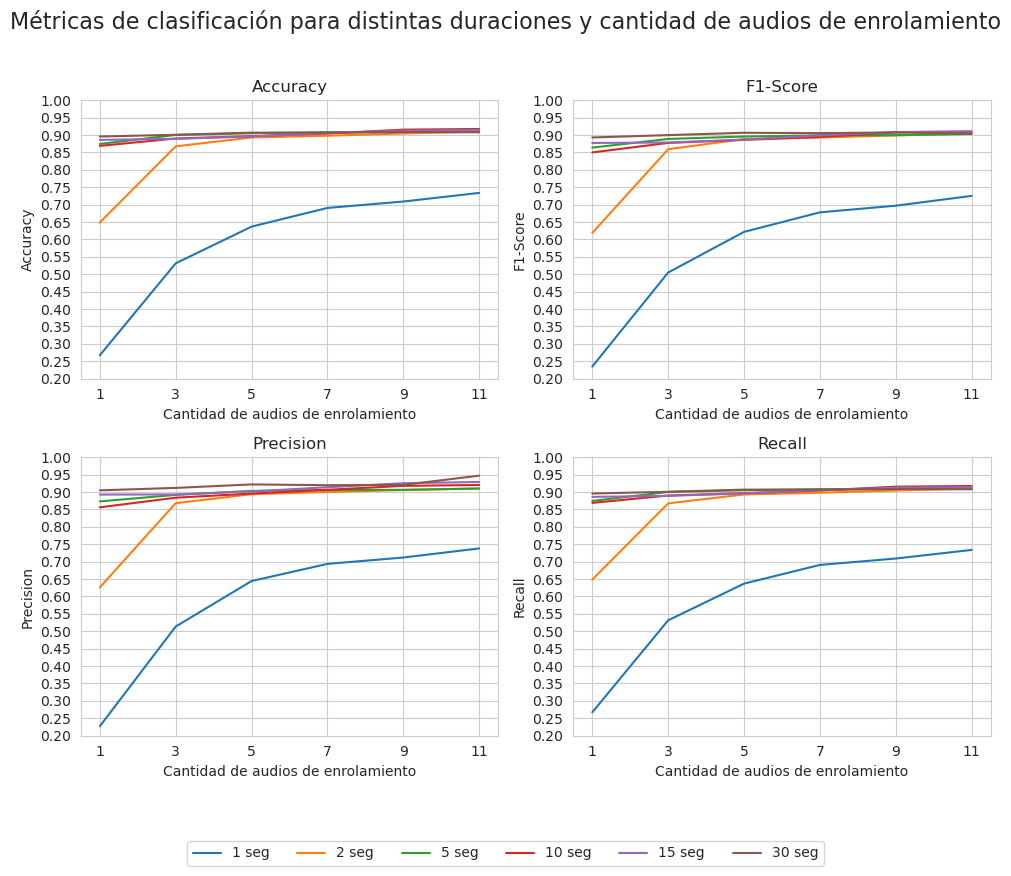

In [ ]:
Ks = [1, 3, 5, 7, 9, 11]
get_metrics(fixed_N76_unbalanced_Y_prediction, fixed_N76_unbalanced_Y_identification, Ks)

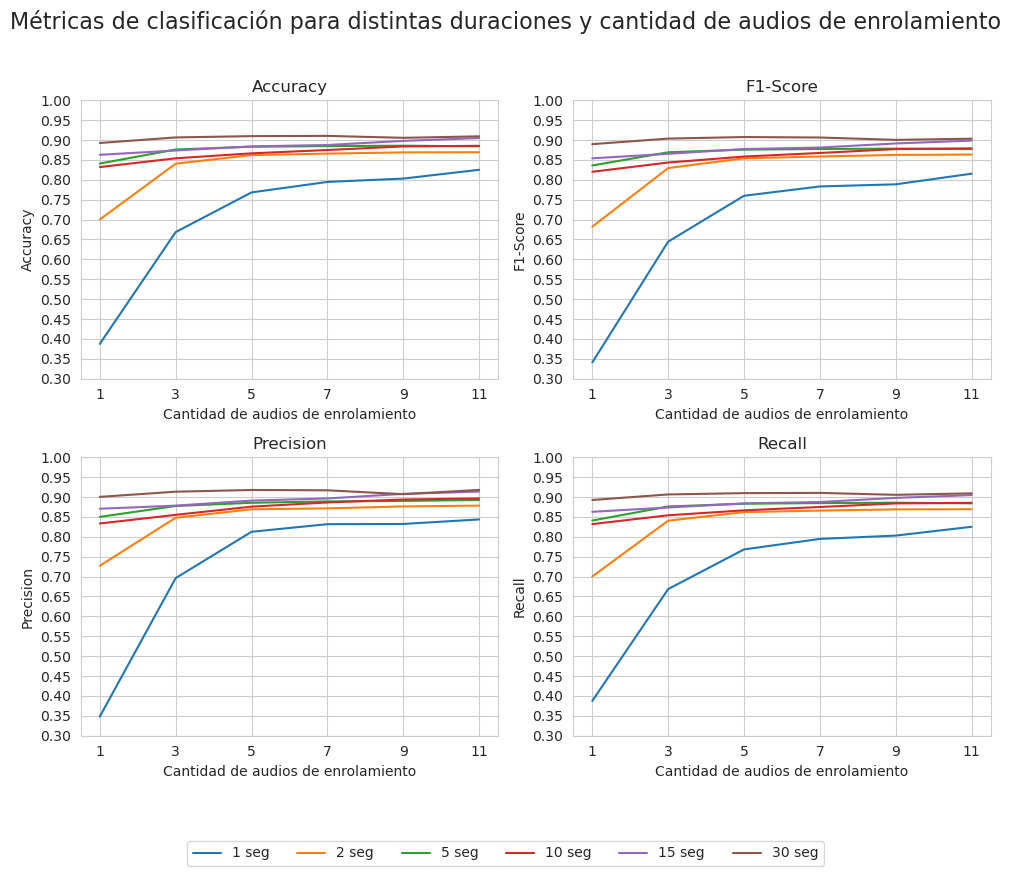

In [ ]:
get_metrics(fixed_N76_unbalanced_Y_prediction_og, fixed_N76_unbalanced_Y_identification_og, Ks)

In [ ]:
from collections import Counter

ALL_LABEL_VECTORS = LABEL_VECTORS + [LABEL_VECTOR_OG]

label_counts = [Counter(arr) for arr in ALL_LABEL_VECTORS]


for i, counts in enumerate(label_counts):
    print(f"Array {i}: {dict(counts)}")

Array 0: {0: 1100, 1: 1100, 2: 1100, 3: 895, 4: 1100, 5: 1100, 6: 1100, 7: 389, 8: 1100, 9: 910, 10: 1100, 11: 1100, 12: 1100, 13: 1100, 14: 1100, 15: 1100, 16: 1100, 17: 1100, 18: 1100, 19: 1100, 20: 1100, 21: 1052, 22: 1100, 23: 316, 24: 1100, 25: 1100, 26: 1100, 27: 1100, 28: 949, 29: 1100, 30: 1100, 31: 1100, 32: 1100, 33: 1100, 34: 1100, 35: 1100, 36: 1100, 37: 1100, 38: 728, 39: 1100, 40: 1100, 41: 764, 42: 684, 43: 1100, 44: 628, 45: 725, 46: 1100, 47: 1100, 48: 1100, 49: 486, 50: 622, 51: 1100, 52: 1100, 53: 1100, 54: 1100, 55: 1100, 56: 1100, 57: 1100, 58: 1100, 59: 1100, 60: 1100, 61: 1100, 62: 1100, 63: 1100, 64: 1100, 65: 1100, 66: 1100, 67: 1100, 68: 1100, 69: 1100, 70: 906, 71: 1100, 72: 1100, 73: 1100, 74: 1100, 75: 1100, 76: 1100, 77: 1100, 78: 1100, 79: 1100, 80: 1100, 81: 1100, 82: 1100, 83: 672, 84: 1100, 85: 1100, 86: 1100, 87: 1100, 88: 1100, 89: 1100, 90: 1100, 91: 137, 92: 1100, 93: 746, 94: 820, 95: 1100, 96: 287, 97: 956, 98: 1100, 99: 584, 100: 1100, 101: 1100

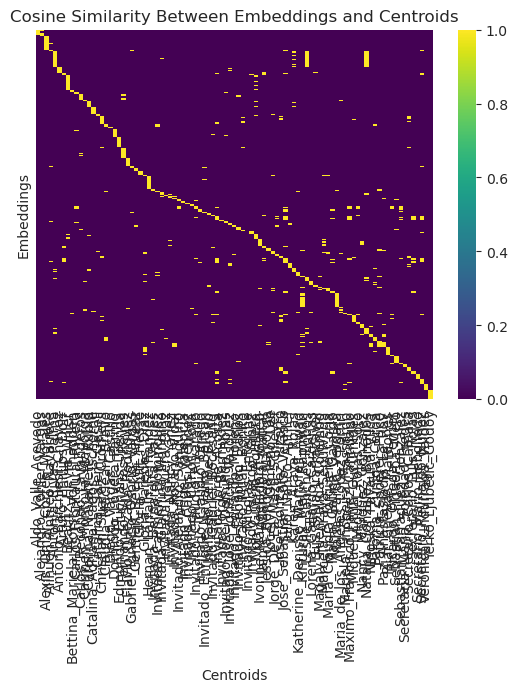

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(20, 40))  # Adjust the size to handle the large matrix
ax = sns.heatmap(similarity_matrix >.7, cmap='viridis', xticklabels=embeddings_by_label.keys(), yticklabels=False)
ax.set_title('Cosine Similarity Between Embeddings and Centroids')
ax.set_xlabel('Centroids')
ax.set_ylabel('Embeddings')
plt.show()

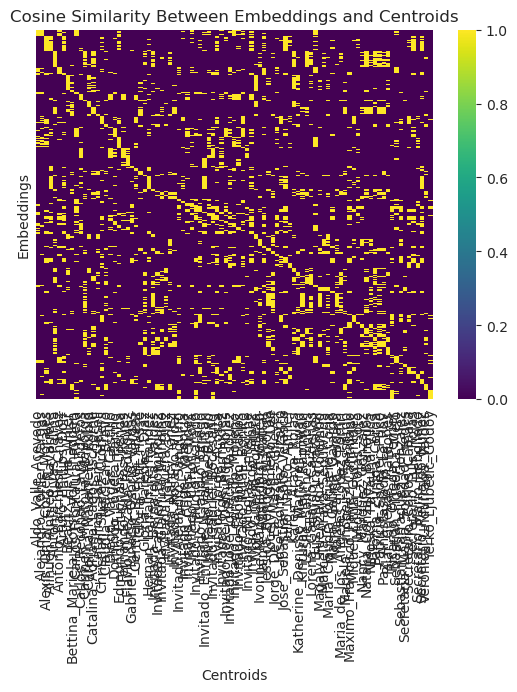

In [ ]:
# plt.figure(figsize=(20, 40))  # Adjust the size to handle the large matrix
ax = sns.heatmap(np.abs(similarity_matrix)>.6, cmap='viridis', xticklabels=embeddings_by_label.keys(), yticklabels=False)
ax.set_title('Cosine Similarity Between Embeddings and Centroids')
ax.set_xlabel('Centroids')
ax.set_ylabel('Embeddings')
plt.show()

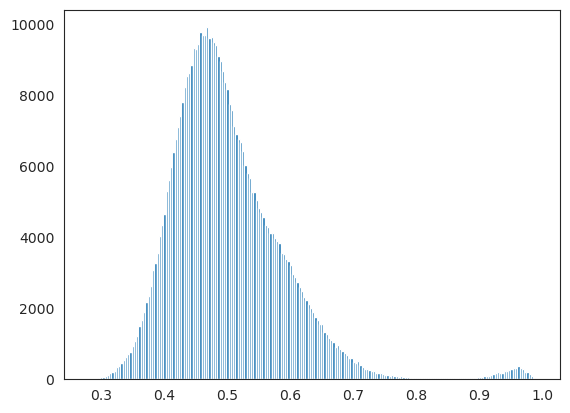

In [ ]:
plt.hist((similarity_matrix).reshape(-1), bins=200);
# plt.yscale("log")

In [ ]:
a = np.vstack(all_embeddings)

NameError: name 'all_embeddings' is not defined

In [ ]:
a

array([[-0.06897517, -0.05414196,  0.06097658, ..., -0.0272247 ,
         0.06051932, -0.04344228],
       [ 0.0395584 , -0.05582495,  0.04575963, ...,  0.03368031,
        -0.06320056, -0.01052512],
       [ 0.05373601, -0.01926537,  0.058074  , ..., -0.06986475,
        -0.1131865 , -0.0717617 ],
       ...,
       [ 0.0434302 , -0.01863375,  0.11141832, ...,  0.05687591,
        -0.01010055,  0.04494489],
       [ 0.07610386, -0.04430066,  0.05074406, ...,  0.08349352,
        -0.07788533,  0.02240222],
       [ 0.02174916, -0.01224554,  0.07873227, ...,  0.15053266,
        -0.0509986 ,  0.01316411]], dtype=float32)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
c = pca.fit_transform(np.log(np.abs(a)))

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
b = tsne.fit_transform(a)
a.shape

<ipython-input-69-ddf4dadee454>:3: RuntimeWarning: invalid value encountered in log
  b = tsne.fit_transform(np.log(a))


ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import umap

reducer = umap.UMAP()
u = reducer.fit_transform(a)


AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
classes = [[e for _ in range(len(embeddings[e]))] for e in embeddings]
classes_result = []
for i in classes:
  classes_result += i
# Create a color map from unique string labels to colors
unique_classes = list(np.unique(classes_result))
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))  # Generate as many colors as there are unique classes
color_map = dict(zip(unique_classes, colors))

# Map the string labels to colors
class_colors = [color_map[cls] for cls in classes_result]


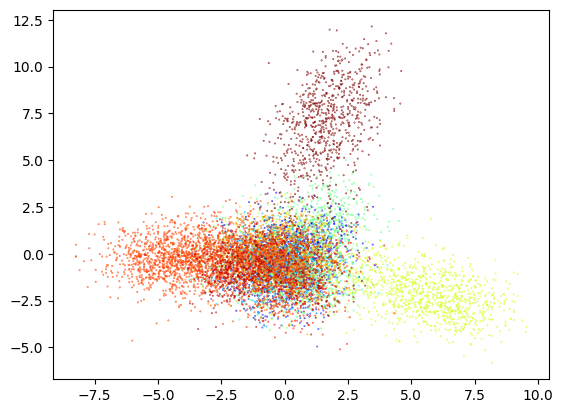

In [ ]:

plt.scatter(*c.T,  color=class_colors, s=.1)

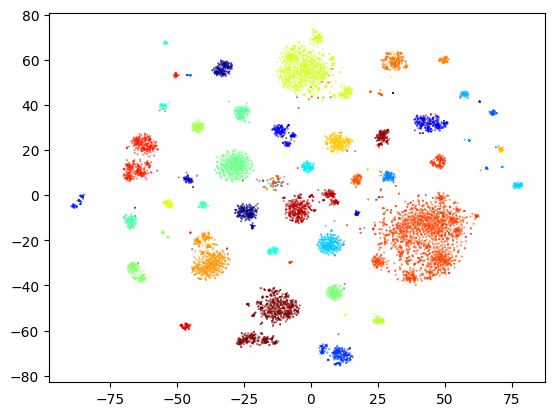

In [ ]:
plt.scatter(*b.T,  color=class_colors, s=.1)